# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

#### Question 1
 - ***Why is this problem important to solve?***
  - Banks generate a *significant* portion of their profits from interests on loans. However, uncertainty in customer repayment behavior creates risks of loan defaults, which can lead to substantial financial losses.

    Identifying customers who are less likely to default enables banks to make informed lending decisions, avoid human biases, reduce default rates, and improve overall portfolio performance.

    Solving this problem provides valuable insights from historical customer data, allowing banks to allocate credit more effectively and protect profitability


### **The objective:**

#### Question 2

 - ***What is the intended goal?***
   - The goal of this project is to develop a machine learning model that predicts loan eligibility based on key characteristics from the Home Equity dataset. This dataset contains historical customer behavior and loan outcomes, enabling the model to identify patterns associated with repayment reliability as well as identifying key factors that attribute to loan defaults.
   
    By leveraging these insights, the model aims to assist in making data-driven lending decisions and reducing the risk of acquiring a client that is likely to default.

### **The key questions:**

#### Question 3
- ***What are the key questions that need to be answered?***
  - There are several questions that need to be answered however, the key questions are:
    1. Has the customer defaulted on a loan in the past, and if so how many times?
    2. How many credit lines has the customer obtained in the last 5 years?
    3. Does employment status effect a customer's ability to make loan payments?
    4. is there a correlation between the remaining mortgage balance and the likelihood of deliquency?
    5. Does the number of derogatory reports, increase the rate at which a customer receives a loan?

### **The problem formulation**:
#### Question 4

- ***What is it that we are trying to solve using data science?***
  - Data science *combines* statistical analysis and computational techniques to solve complex problems. By utilizing statistical significance and advanced algorithms, we can build models that provide clear, interpretable insights to predict customer loan defaults.
  
    Using a machine learning model, can reduce the biases that can occur by manual decision-making, accurately estimate the liklihood of default, and identify key factors that incluence loan approval and repayment behavior.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score,precision_score,accuracy_score,f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [4]:
df  = pd.read_csv('/content/drive/MyDrive/MIT Program Files/Colab Notebooks/Capstone Project/hmeq.csv')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


## Summary Statistics

In [5]:
df.info()
print('')
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BAD,5960.0,NaN,NaN,NaN,0.199497,0.399656,0.0,0.0,0.0,0.0,1.0
LOAN,5960.0,NaN,NaN,NaN,18607.969799,11207.480417,1100.0,11100.0,16300.0,23300.0,89900.0
MORTDUE,5442.0,NaN,NaN,NaN,73760.8172,44457.609458,2063.0,46276.0,65019.0,91488.0,399550.0
VALUE,5848.0,NaN,NaN,NaN,101776.048741,57385.775334,8000.0,66075.5,89235.5,119824.25,855909.0
REASON,5708,2,DebtCon,3928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JOB,5681,6,Other,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOJ,5445.0,NaN,NaN,NaN,8.922268,7.573982,0.0,3.0,7.0,13.0,41.0
DEROG,5252.0,NaN,NaN,NaN,0.25457,0.846047,0.0,0.0,0.0,0.0,10.0
DELINQ,5380.0,NaN,NaN,NaN,0.449442,1.127266,0.0,0.0,0.0,0.0,15.0
CLAGE,5652.0,NaN,NaN,NaN,179.766275,85.810092,0.0,115.116702,173.466667,231.562278,1168.233561


In [6]:
df.nunique()

,0
BAD,2
LOAN,540
MORTDUE,5053
VALUE,5381
REASON,2
JOB,6
YOJ,99
DEROG,11
DELINQ,14
CLAGE,5314


### Observations from Summary Statistics:
- There are a total of 5,960 rows of applicants, and 13 attributes.

- In this dataset there is a mix of 3 datatypes present: Int(2), float(9), and objects(2)

- The data has a lot of missing values that will need to be treated and addressed.

  Out of the 13 attributes **BAD**, and **LOAN** are the only two with no null values. The remaining attributes do:
  - **MORTDUE** 518 missing values.
  - **VALUE** 112 missing values.
  - **REASON** 252 missing values.
  - **JOB** 279 missing values.
  - **YOJ** 515 missing values.
  - **DEROG** 708 missing values.
  - **DELINQ** 508 missing values.
  - **CLAGE** 308 missing values.
  - **NINQ** 510 missing values.
  - **CLNO** 222 missing values.
  - **DEBTINC** 1,267 missing values.

- The average age of the oldest credit line (**CLAGE**) is about 179 months with a standard deviation of 85. This would indicate some variability for this attribute.

- The average number of **Credit Lines** (**CLNO**) is about 21 with a standard deviation of 10 meaning the average person can have anywhere from 11 to 31 lines of credit assuming a normal distribution of the data.

- The average Debt-to-Income Ratio (**DEBTINC**) in this dataset indicates that borrowers spend approximately 34% of their gross monthly income on debt payments.

- The job category **'other'** is the most common selection with the frequency being 2,388 of the 5,681, roughly 42%. And the average number of years on the job is about 8 years.

- Of the two primary reasons a customer would request a loan, 68% choose debt consolidation. This suggests that the average person has multiple credit line payments to assist with other liabilites.







In [7]:
# Distribution of the Target Variable
df['BAD'].value_counts(normalize=True)

,proportion
BAD,
0,0.800503
1,0.199497


### Observations:
The BAD Target Variable shows an imbalance. 80% of the borrowers in the data repaid back their loan, and 20% defaulted.

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


### Categorical Variables

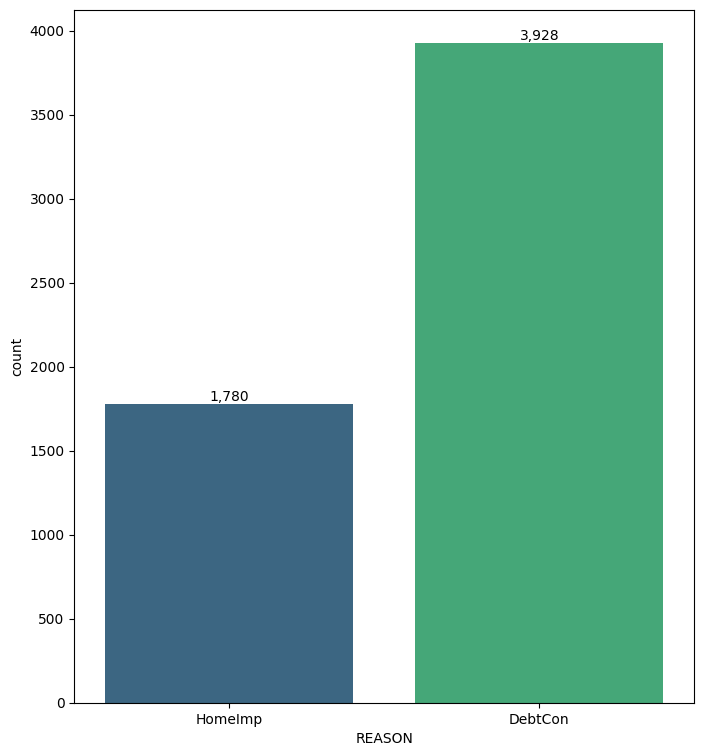

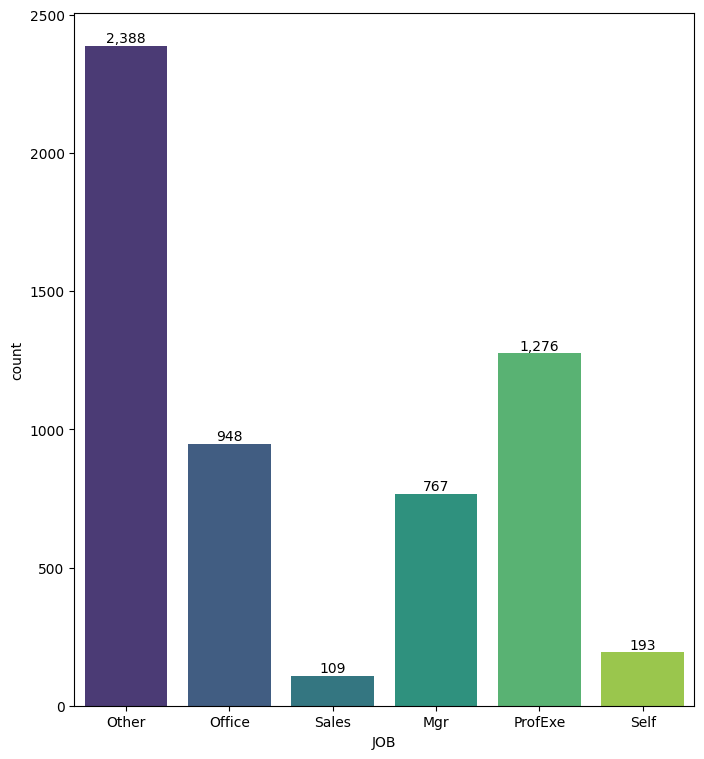

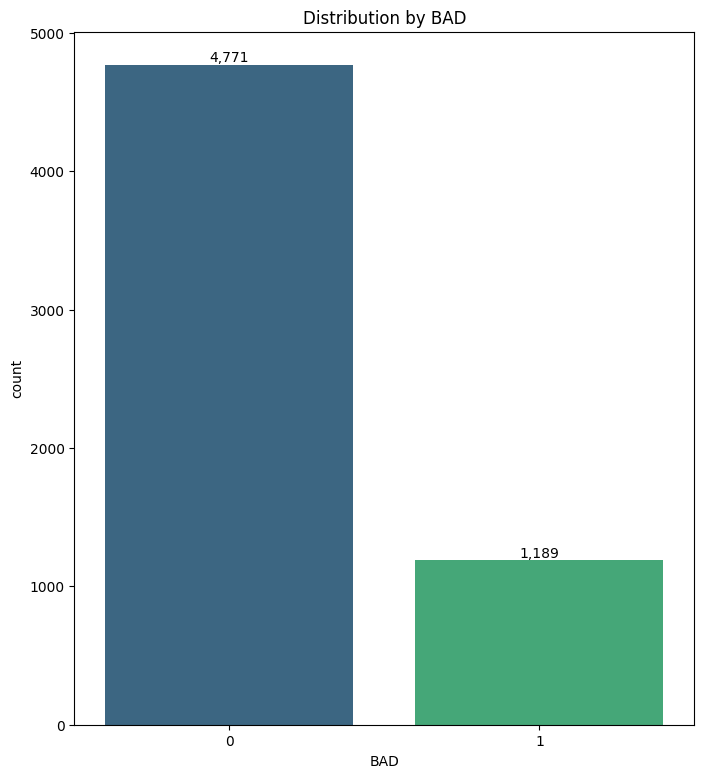

In [8]:
df_cat = df[['REASON','JOB','BAD']]

for i in df_cat:
  plt.figure(figsize=(8,9))
  ax = sns.countplot(df_cat,x = i,palette='viridis')
  for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}', (p.get_x() + p.get_width() / 2 , height), ha='center',va='bottom')
plt.xlabel (f'{i}')
plt.title(f'Distribution by {i}')
plt.show()
print('')

### Observations:
- Like we have stated previously, The reason a customer is likely to acquire a loan is due to **Debt Consolidation**.

- Excluding the "Other" category, the second most common employment type among borrowers is **Professional Executive** followed by **Office** and **Manager**.

- Interestingly, for our target variable (**BAD**) we can observe that 80% of borrowers repay their loans opposed to defaulting. This is displaying a class imbalance where most of the borrowers are repaying their loan. This will need to be addressed when we begin generating models.

### Numerical Variables

In [9]:
df_num = df[['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']]


In [10]:
# Creating a function to display histogram and boxplot

def histbox_plot(a,b):
  """ the purpose of this function is to create a subplot with both a histogram and boxplot"""
  fig,ax = plt.subplots(1,2,figsize=(12,8))

  sns.histplot(data = a,x= b,kde=True, ax=ax[0])
  ax[0].set_title(f'Histogram with KDE for {i}')

  sns.boxplot(data=a,x=b,color='pink',ax=ax[1])
  ax[1].set_title(f'Boxplot for {i}')

  plt.tight_layout()
  plt.show()
  return

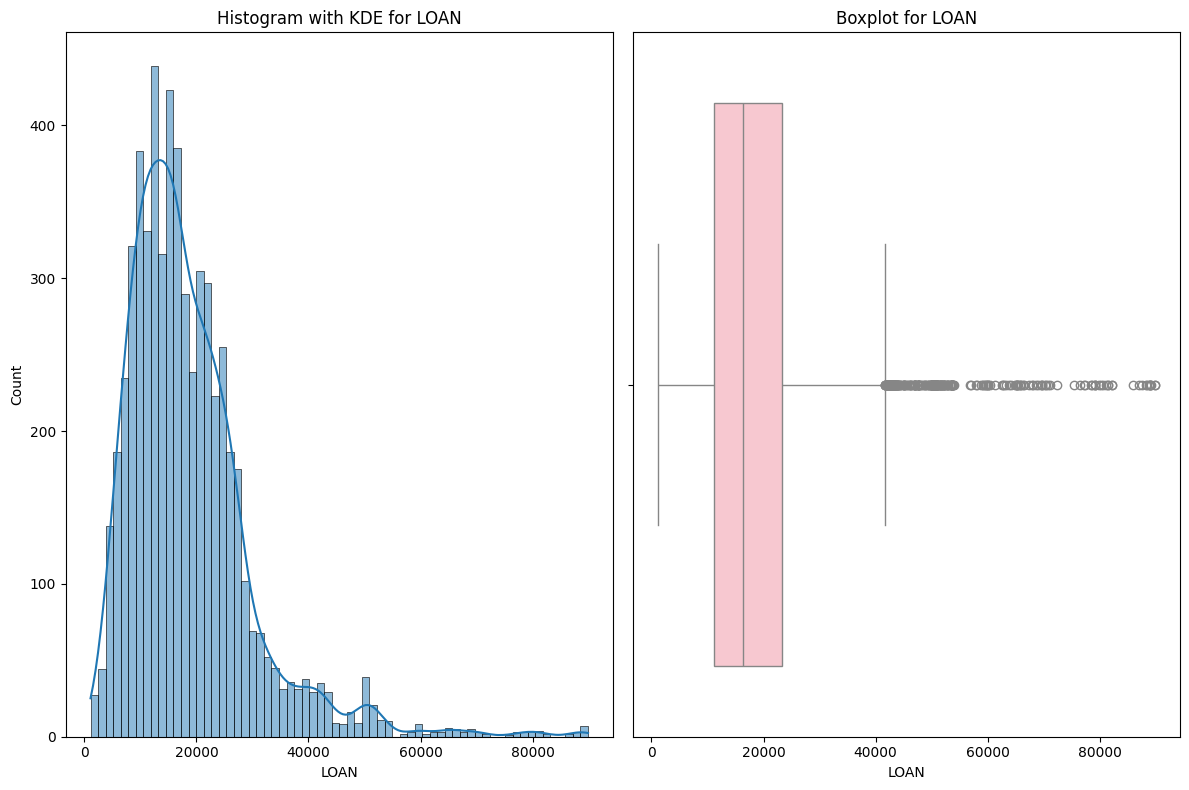

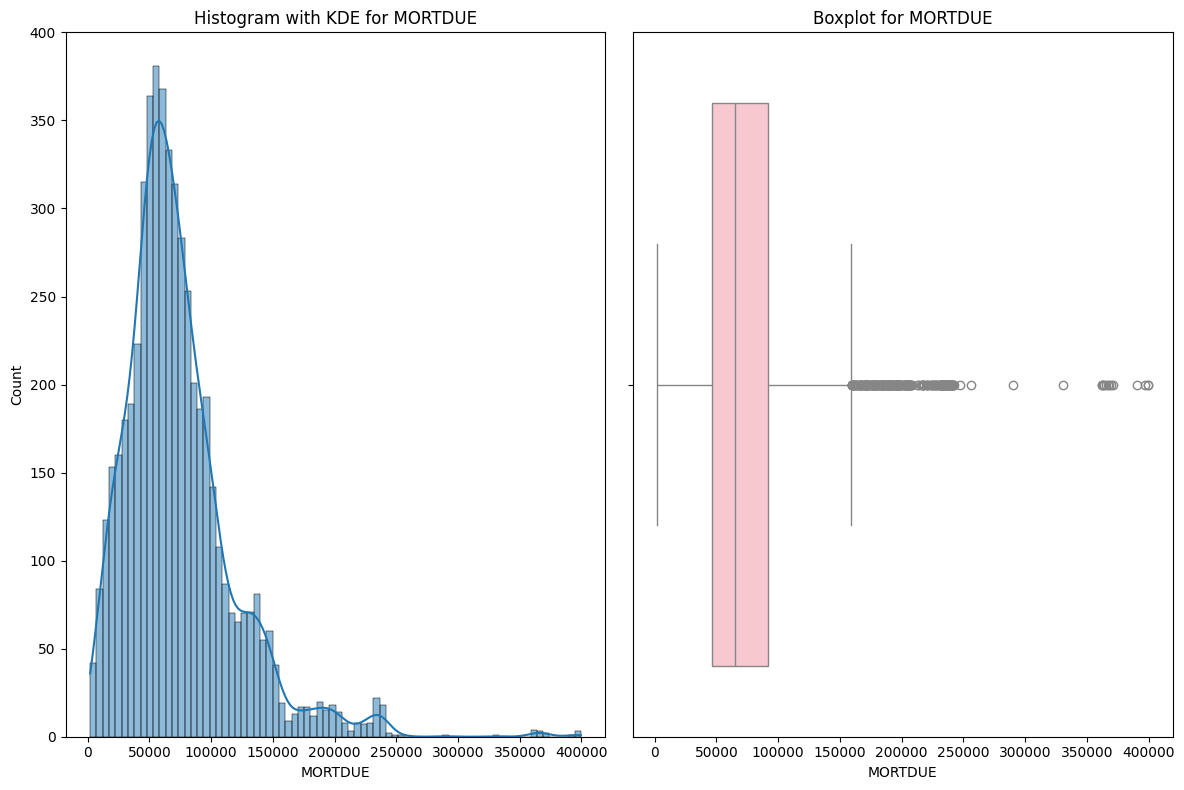

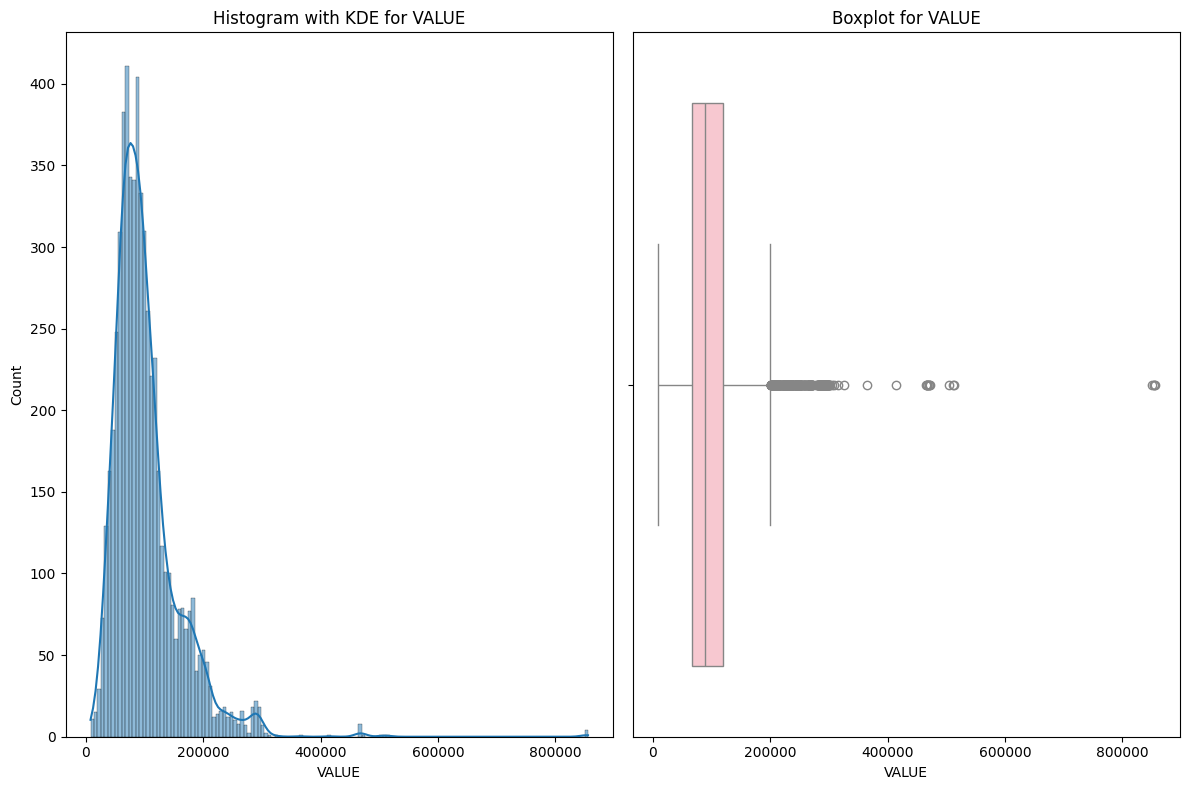

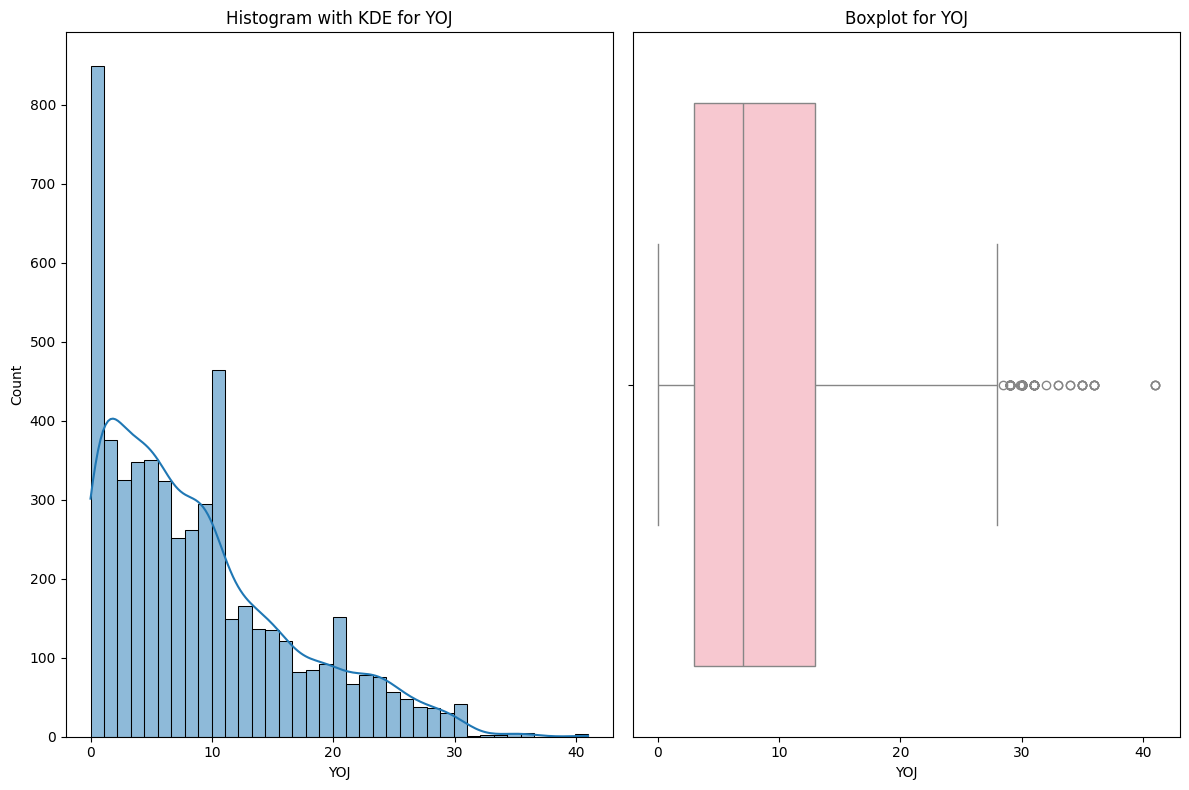

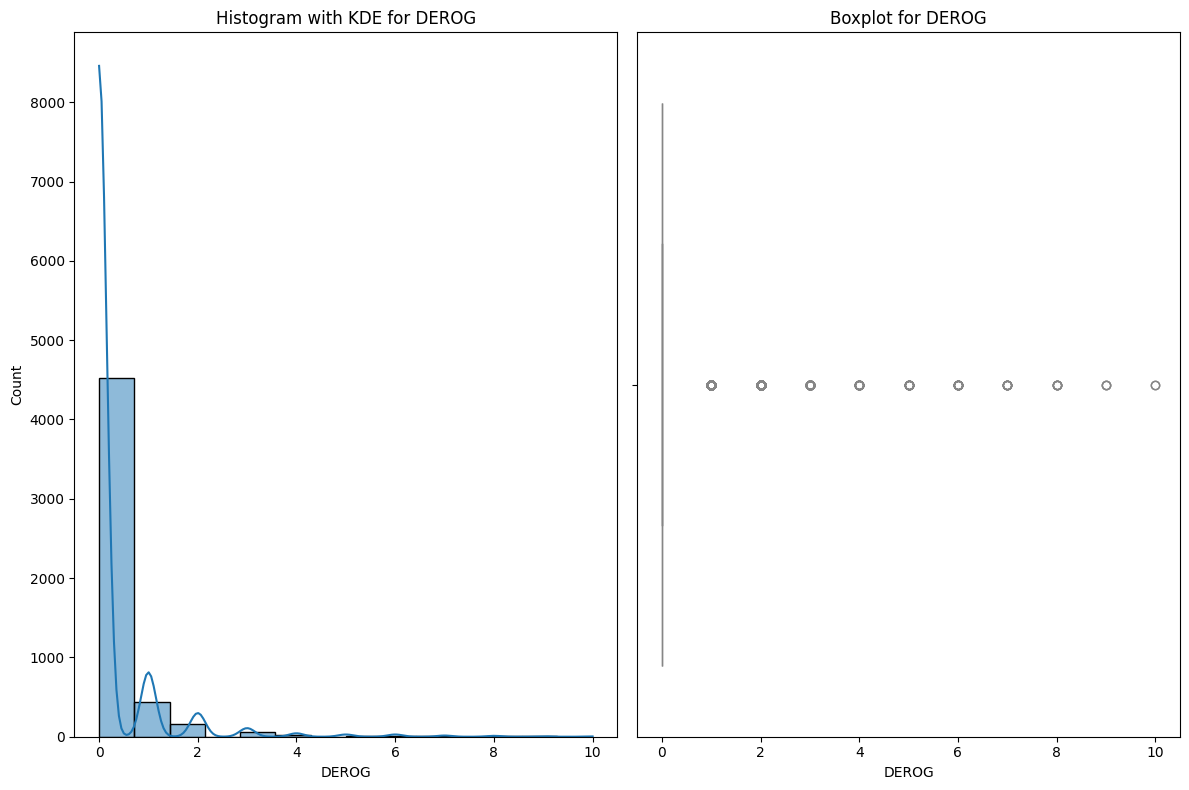

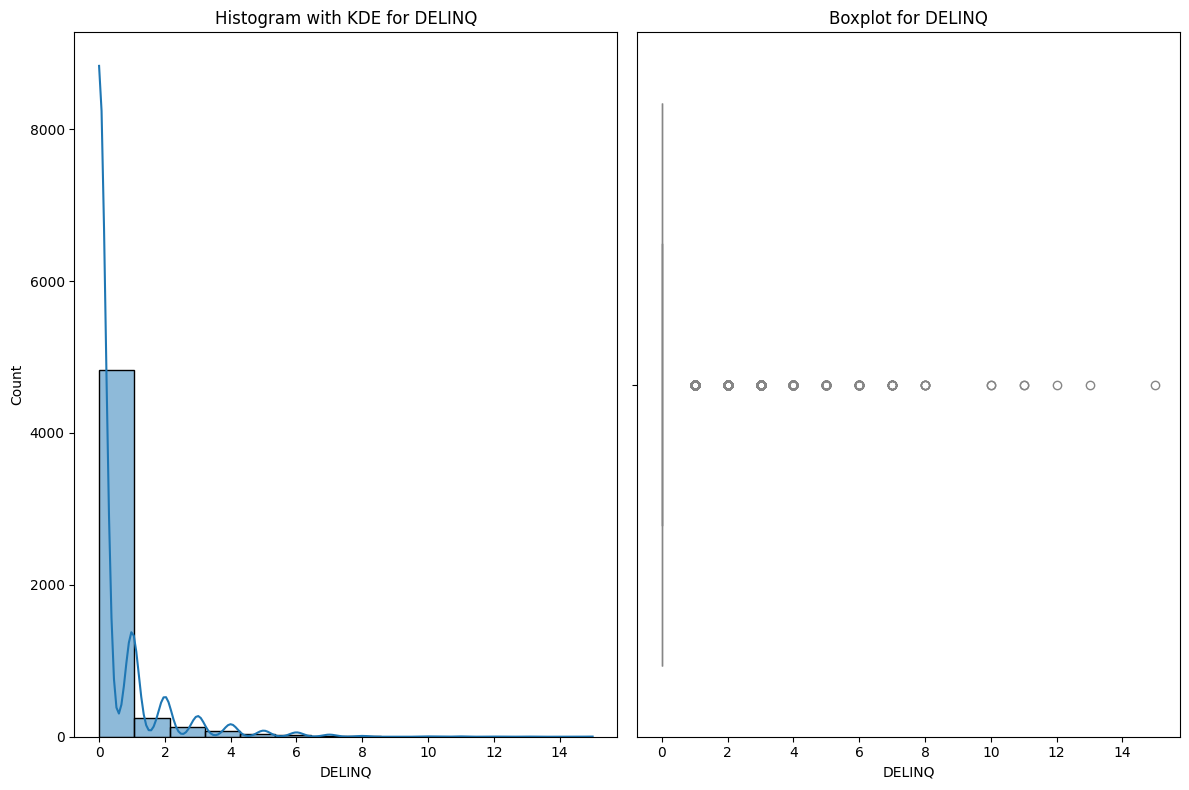

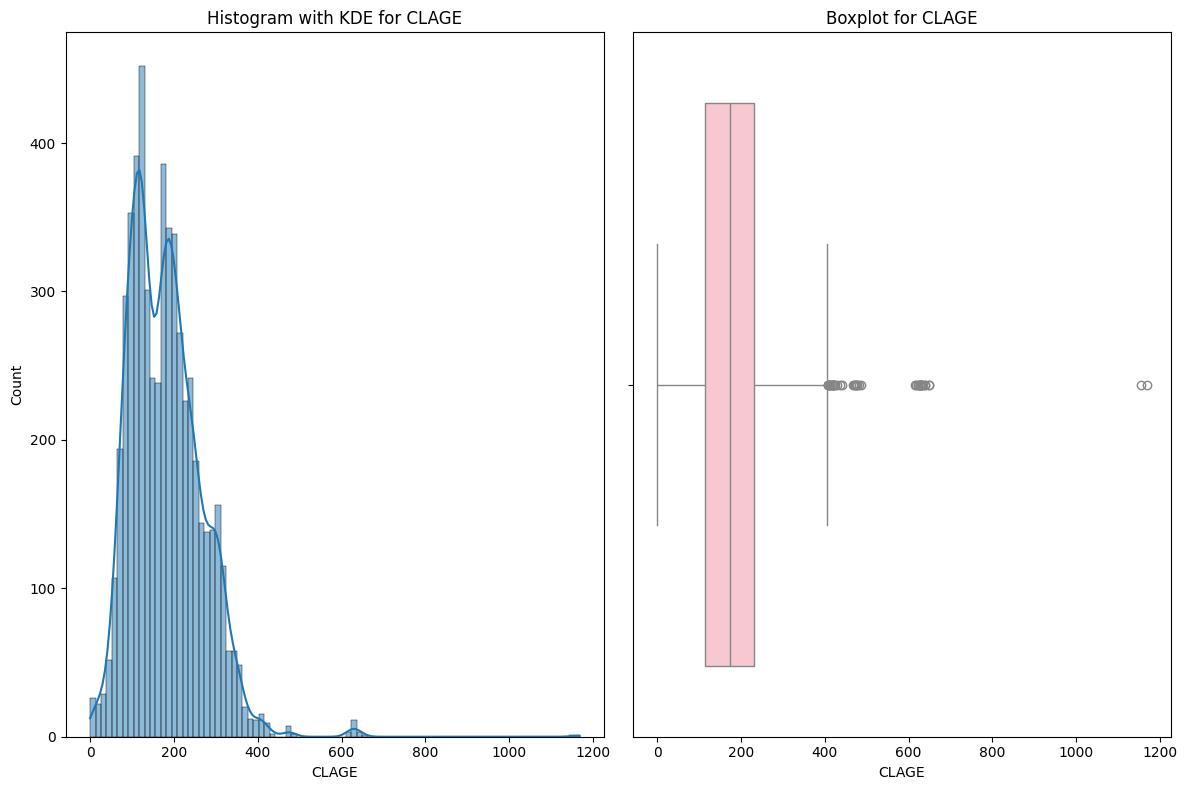

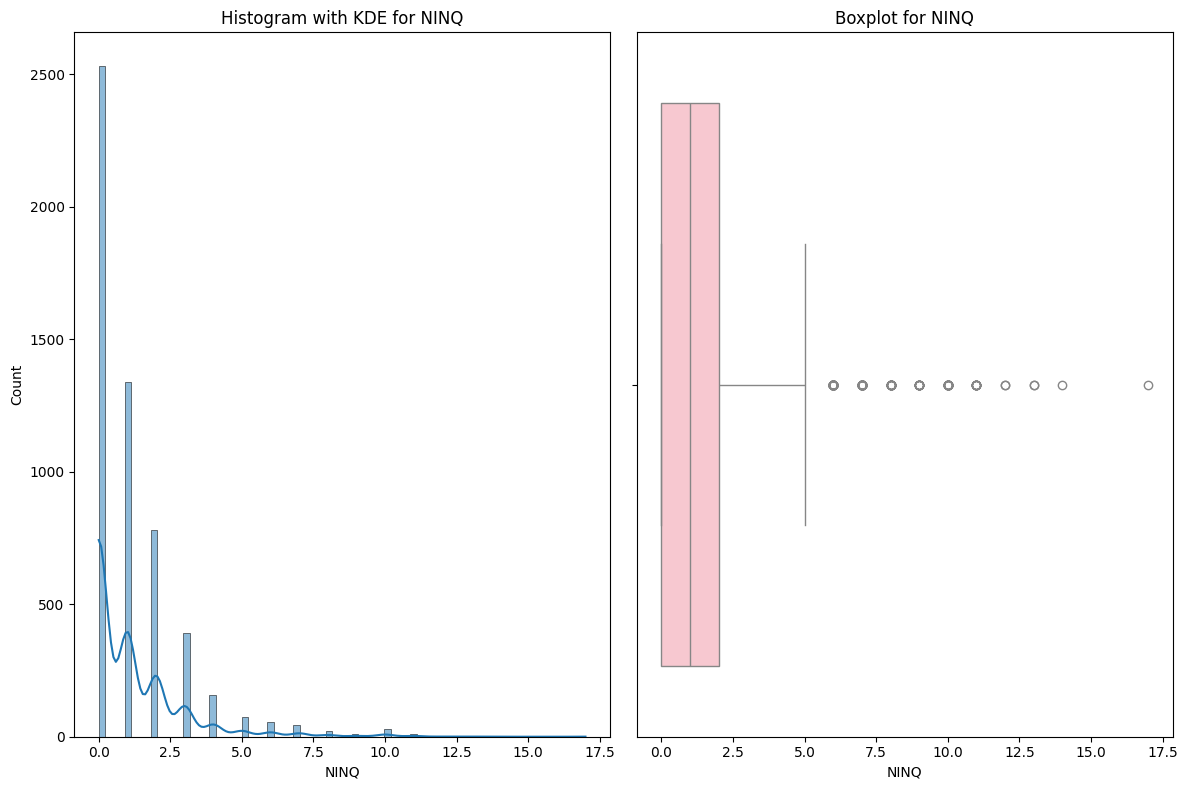

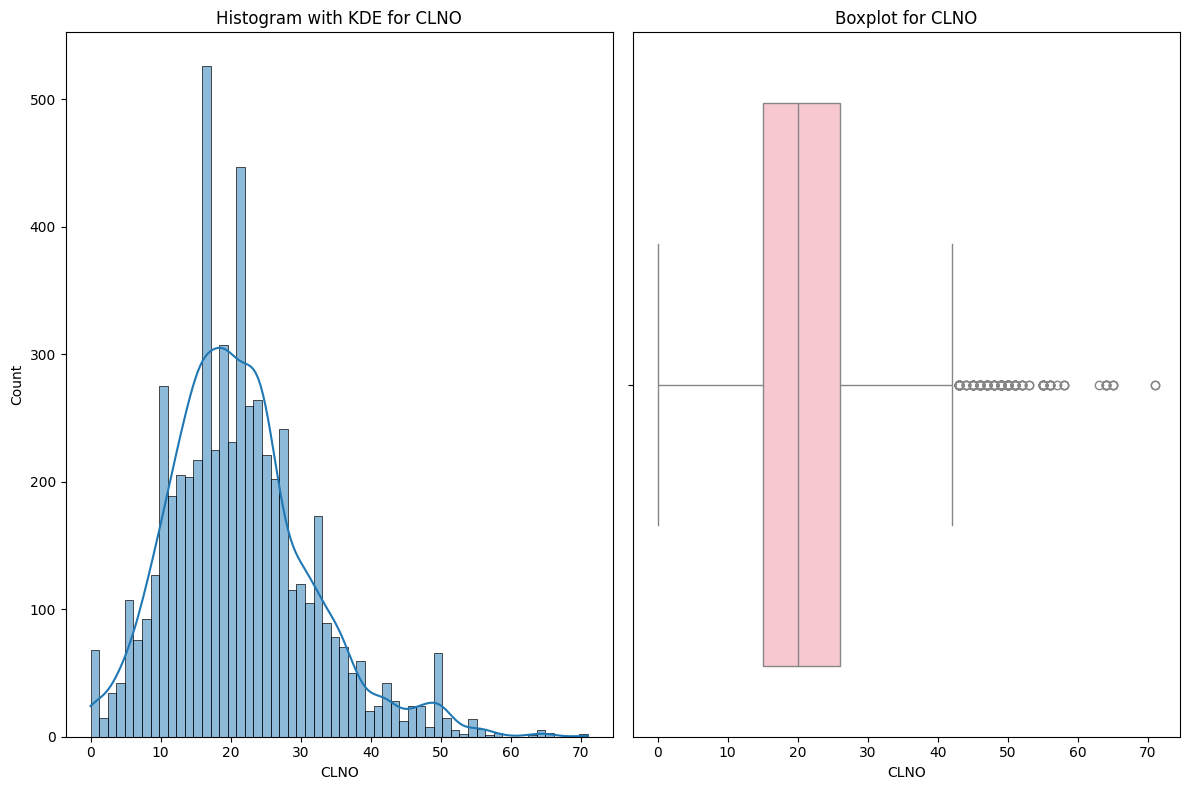

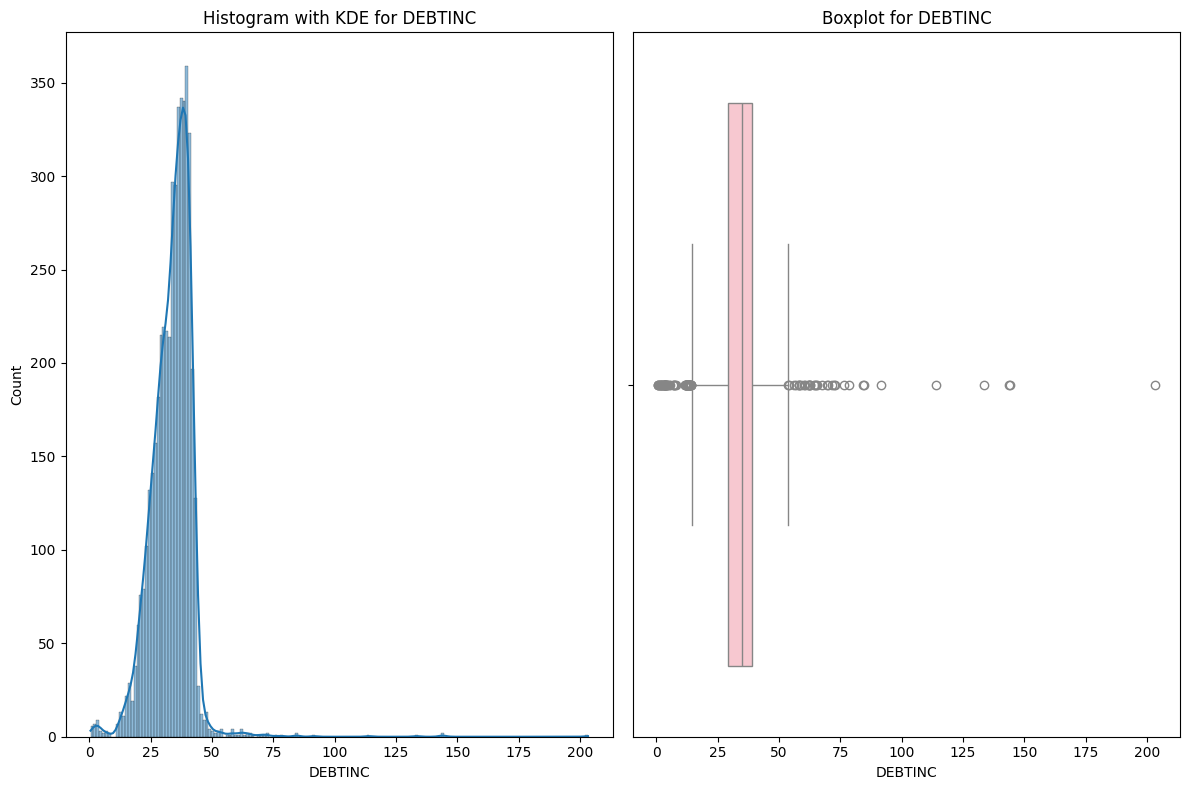

In [11]:
for i in df_num:
  histbox_plot(df_num,i)
  print('')
  print('')

### Observations:
The visual shows that the amount borrowers are loaned displays a *right skew distribution*. The majority are lent anywhere from 11,100 to 23,300. We also can analyze that there are outliers present in the data suggesting certain borrowers request more than the inner quartile with the max being 89,900.

The amount of **Mortgage Due** shows a *right skew distribution*. The inner quartile captures roughly anywhere from 46,200 to 91,400. The average of the remaining mortgage due is $73,700 however; it is heavily skewed due to the number of outliers present in the data.

**Value** distribution is also skewed towards the *right* of which the majority fall within the range between 6,500 to 119,800. Outliers are also present with this variable, which impacts the average.

**Year on the job** follows a *right skewed distribution** with fewer outliers. The average inner quartile range falls between 3 to 13 years. The average is about 7.5 years.

Very few borrowers have derogatory remarks in their portfolio. The majority fall between 0 to 2. Judging how the target data (**BAD**) shows higher borrowers who do not default on the loan, it becomes fairly clear that the majority have few derogatory reports. The same can be said for Delinquency with few borrowers having missed repayments.

The **age of the oldest credit line** displays a *right skewed distribution*. The range most borrowers fall between 115 (roughly 9 and a half years) to 231 months (roughly 19 years). Due to the skewness of the distribution the average is impacted with an average of 179 months roughly 14 years) and a standard deviation of 85

The number of recent credit inquiries is also showing some skewness toward the *right side* of the histogram. However, we can observe that majority have 0 lines of recent credit inquires and that as the number of inquiries increase, less borrowers appear, showing a downward trend. Outliers are present in the dataset for the number of recent credit lines with as high as 17 total credit lines.

The number of existing credit lines has a little bit of *right skeweness* to the data; however, it does show some characteristics of the bell curve and a more normal distribution. The average of existing credit lines most borrowers have is about 21 credit line. The inner quartile range fall between 15 to 26 credit lines.

The **Debt-to-Income Ratio** follows a *right skewed distribution*. The inner quartile range most borrowers fall between is 29% to 39%. There are outliers present on both sides of the distribution which indicates high variability for this variable.


### **Bivariate Analysis**

In [12]:
# Define a function to create a scatterplot to see the relationship between 2 variables.

def scatter_plot(a,b):
  """ This function will create a labled scatterplot among two variables to visualize the relationship"""
  plt.figure(figsize=(10,8))
  sns.scatterplot(df,x=a,y=b,palette='Set1',hue_norm=(0,7))
  plt.xlabel(a)
  plt.ylabel(b)
  plt.title(f'Relationship between {a} and {b}')
  plt.tight_layout()
  plt.show()
  return


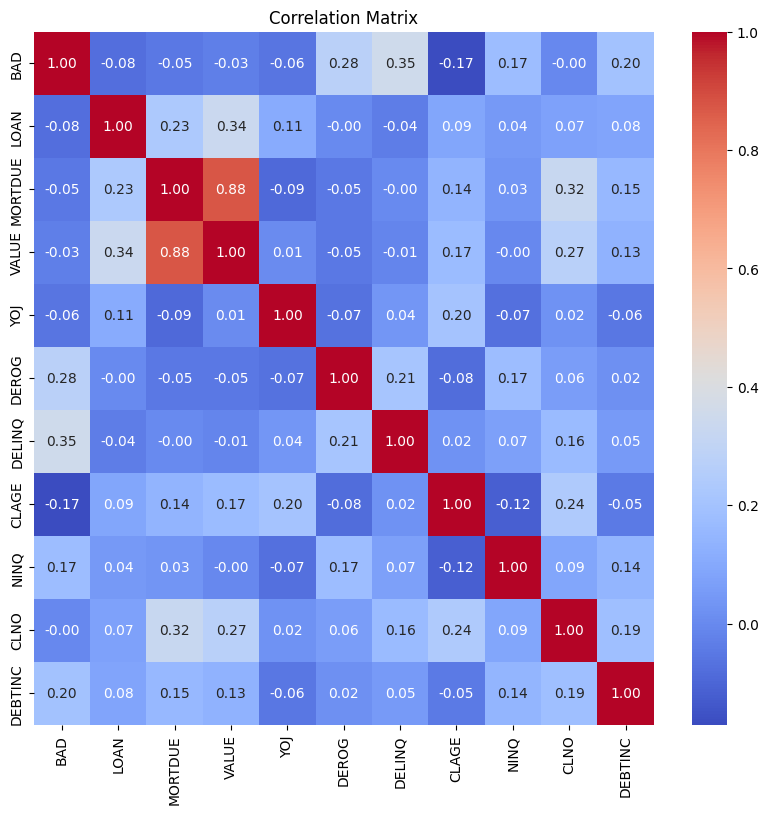

In [13]:
### corralation between variables
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,9))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Observations:
Some interesting insights we can note are the relationship between **MortDue** and **Value** showing a stong positive correlation amonst all other relationships with .88.

Our target variable **BAD** has the stongest correlation with **DELINQ, DEROG, DEBTINC**.

These features may help the model with making predictions.


Other moderately positive correlations that we can make are:

- LOAN and VALUE = .34

- BAD and DELINQ = .35

- MORTDUE and CLNO = .32

- BAD and CLAGE = -.17

- LOAN and MORTDUE = .23




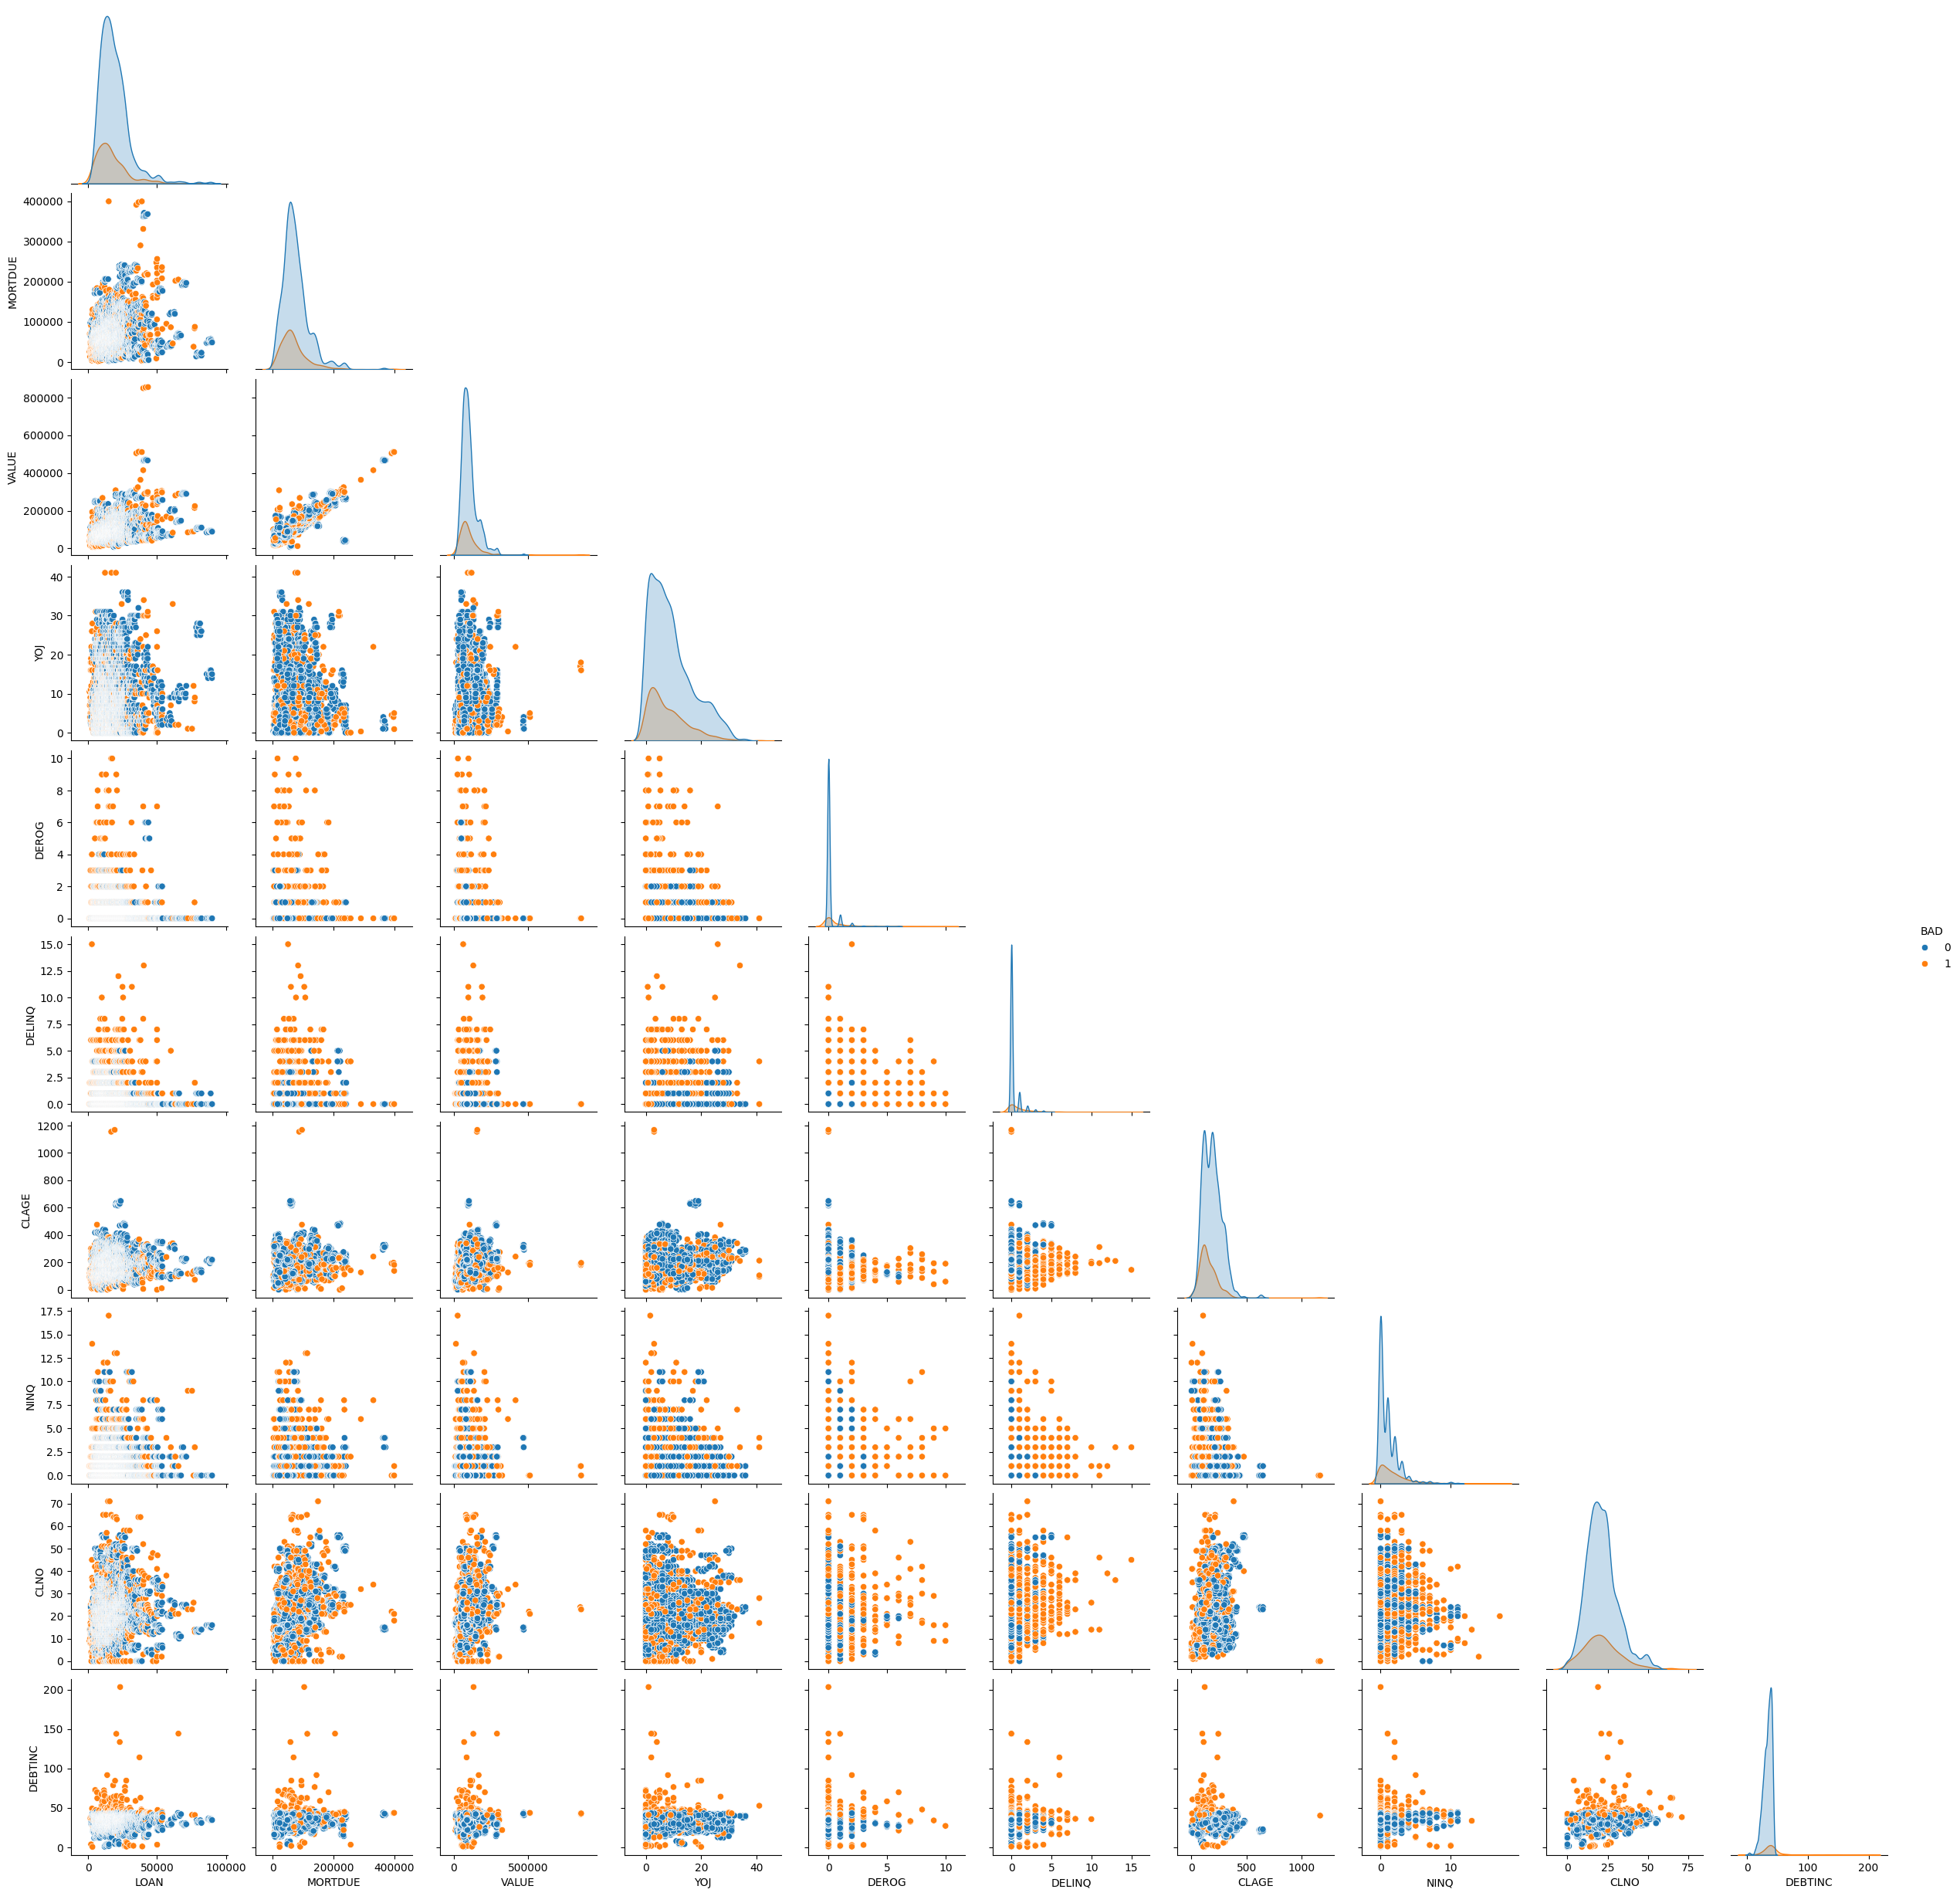

In [16]:
# Visualizing all scatter plot relationships
sns.pairplot(df,corner=True,hue='BAD')

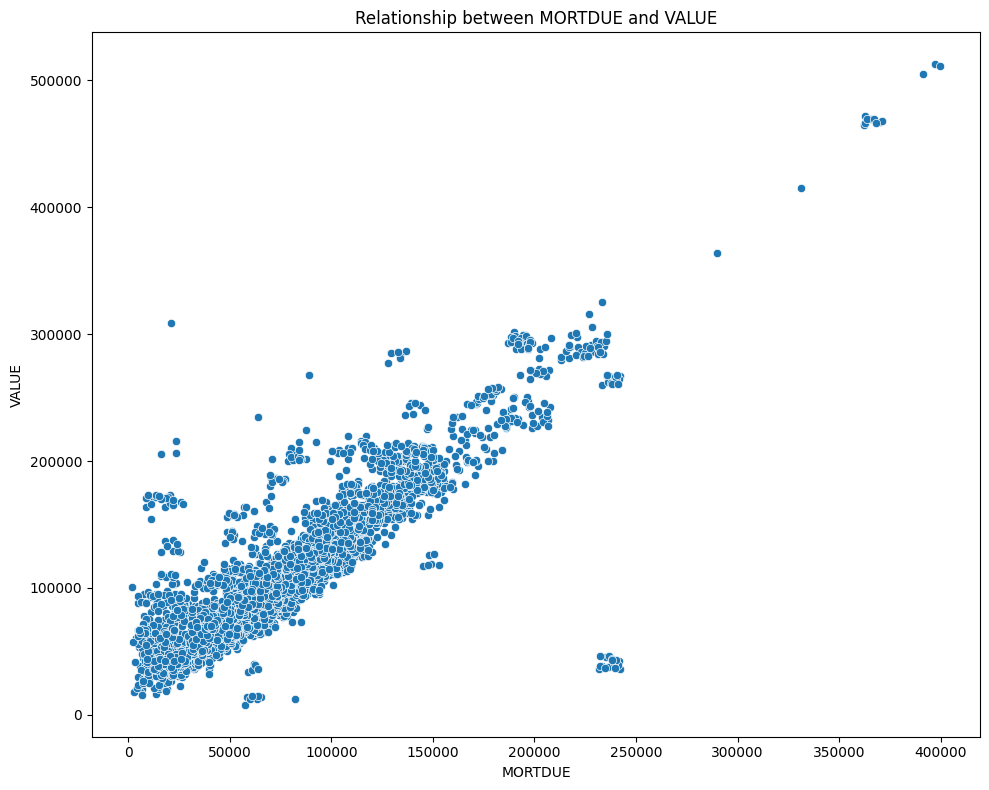

In [18]:
scatter_plot('MORTDUE','VALUE')

### Observations:
We can see a positive correlation between the **Value** of the property and the **Mortgage Due**. As value increases, the mortgage remaining also increases

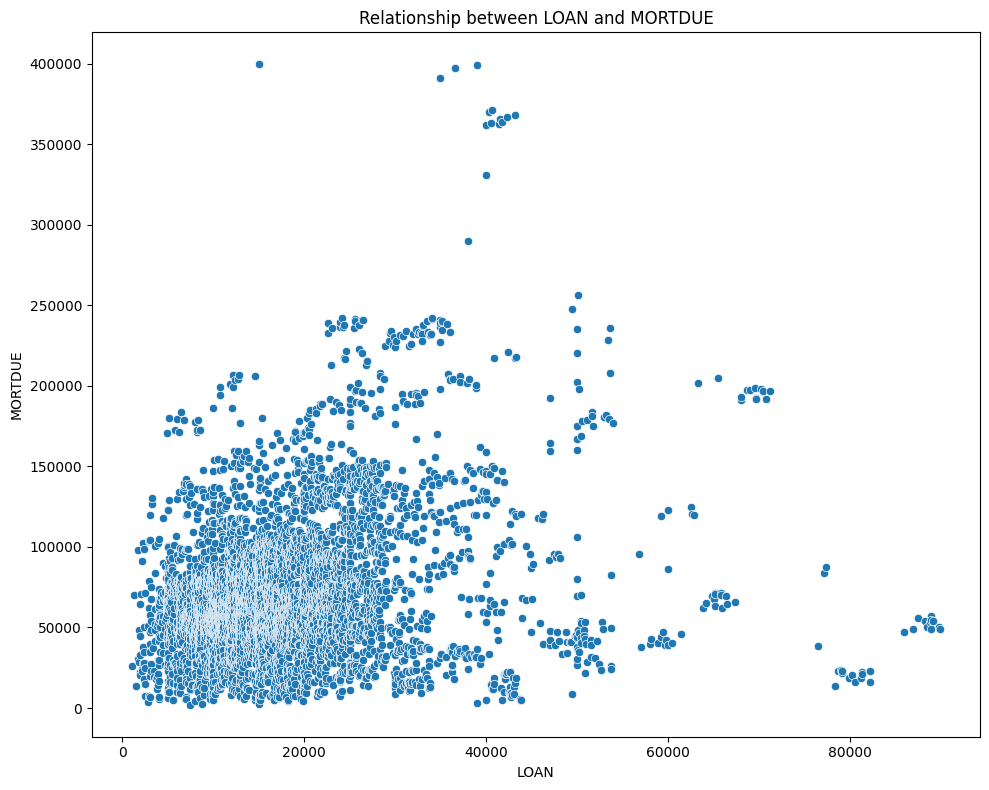

In [19]:
scatter_plot('LOAN','MORTDUE')

### Observations:

The relationship between **mortgage due** and the **loan amount** received displays a large cluster where the loan approved is around 18,000 and mortgage due around 80,000

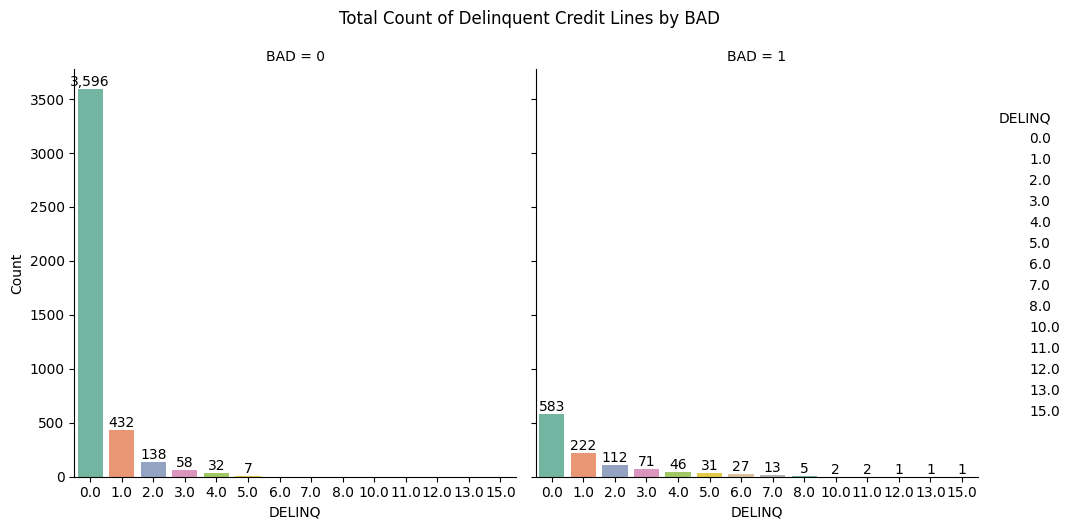

In [20]:

g = sns.catplot(data=df,x='DELINQ',kind='count',col='BAD',palette='Set2')

for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height):,}',(p.get_x() + p.get_width() / 2, height),ha='center', va='bottom')

g.set_axis_labels("DELINQ", "Count")
g.fig.suptitle("Total Count of Delinquent Credit Lines by BAD", y=1.05)

plt.show()

### Observations:
When comparing the two classes for borrowers who defaulted on their loan versus borrowers who repay their loans, we observe that there is a drop off at 5 delinquent credit lines.

Interestingly, the number stretches down to about *15* for the borrowers who did default.
This partially shows the correlation between Delinquent Credit Lines and their behavior with loan repayments


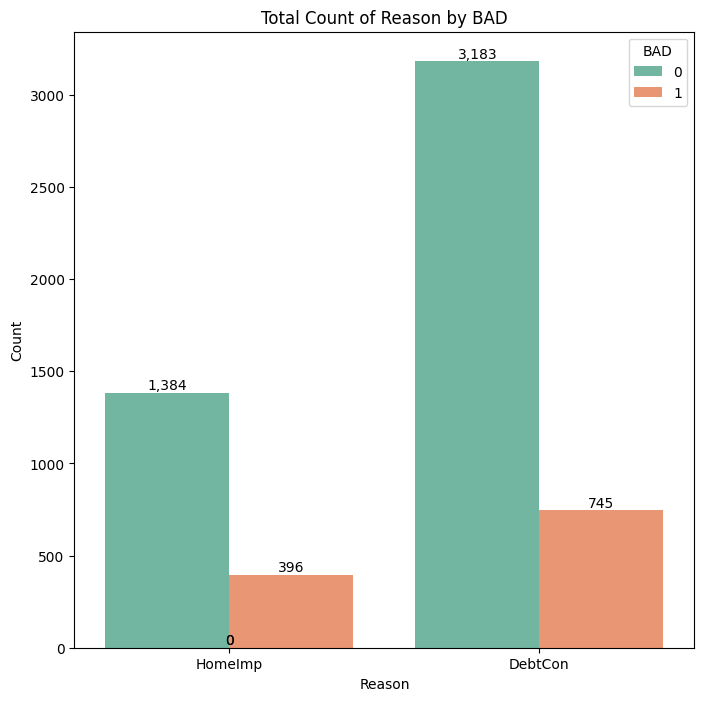

In [21]:
plt.figure(figsize=(8,8))
ax = sns.countplot(df,x='REASON',hue='BAD',palette='Set2')
for p in ax.patches:
  height = p.get_height()
  ax.annotate(f'{int (height):,}', (p.get_x() + p.get_width() / 2,height), ha='center',va='bottom')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.title('Total Count of Reason by BAD')
plt.show()

#Observations:
As we’ve pointed out earlier, the majority of borrowers request a loan due to **Debt Consolidation**.

Borrowers whose reasons are toward **Home improvement**: 22% of them default on a loan. For **Debt Consolidation** 18% of borrowers default on a loan.

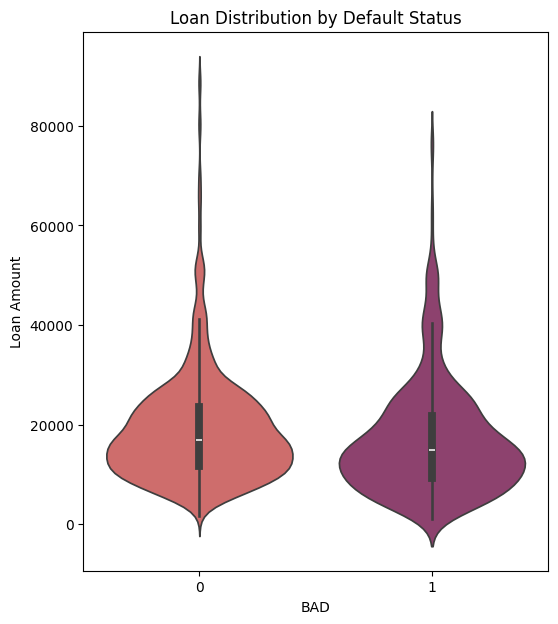

,LOAN
BAD,
0,19028.107315
1,16922.119428


In [22]:
plt.figure(figsize=(6,7))
sns.violinplot(data= df,x='BAD',y='LOAN',palette = 'flare')
plt.ylabel('Loan Amount')
plt.xlabel('BAD')
plt.title('Loan Distribution by Default Status')
plt.show()

df.groupby('BAD')['LOAN'].mean()


### Observations:
By looking at the distribution of the loan amount received by **BAD**, we can observe that the borrowers who do pay back their loans have a higher average of received loans than those who default.

However, it is important to note there are outliers in the data due to the skewness of the distribution.



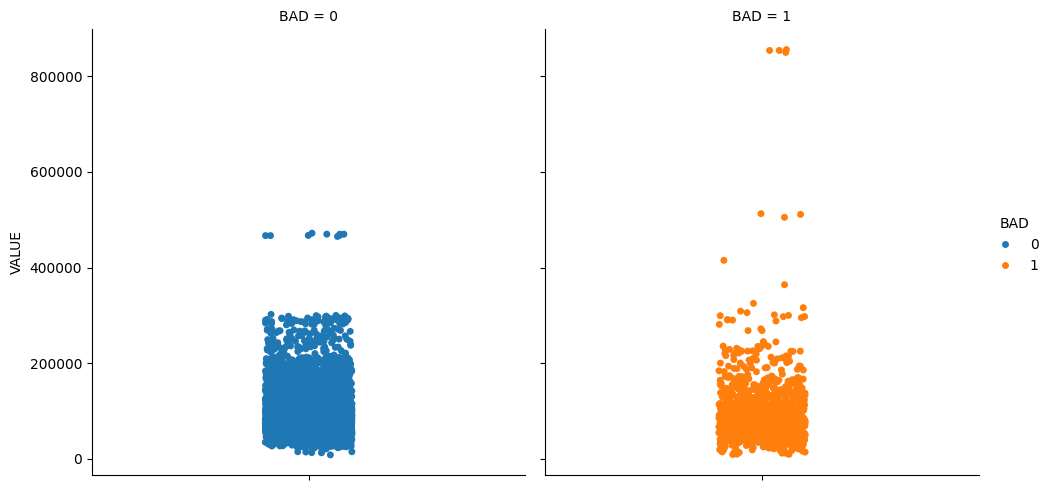

In [23]:
sns.catplot(df, y='VALUE',kind = 'strip',col='BAD',hue = 'BAD')
plt.show()

### Observations:
From this visual we notice that borrowers who repay their loan tend to have values concentrated around 100,00 to 300,000. For those who default, it shows roughly under 200,000 of value on their property.

### **Multivariate Analysis**

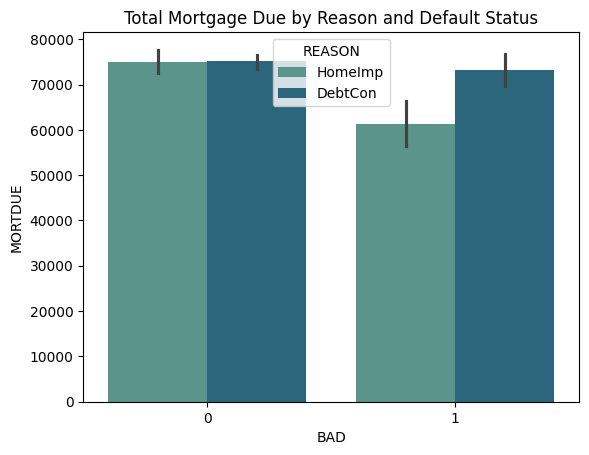

In [24]:
sns.barplot(df,x='BAD',y='MORTDUE',hue = 'REASON',palette='crest')
plt.title('Total Mortgage Due by Reason and Default Status')
plt.show()


### Observations:
- Borrowers who defaulted on their loans typically have a *low mortgage balance* compared to borrowers who repay their loans.

By comparing the reason, we notice that when the reason is for Home improvement, they tend to have less due on their mortgage.

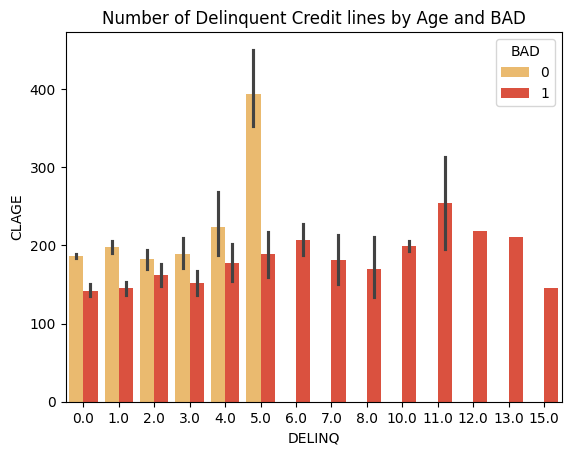

In [25]:
sns.barplot(df,x='DELINQ',y='CLAGE',hue='BAD',palette ='YlOrRd' )
plt.title('Number of Delinquent Credit lines by Age and BAD')
plt.show()

### Observations:
Like we have observed earlier, we notice borrowers who do not default, do not have *more than 5 delinquent credit lines*.

Interestingly, we notice that there is a spike for borrowers in the non-default class at 5 delinquent credit lines. The oldest credit line age falls between 300 to almost 500 months.


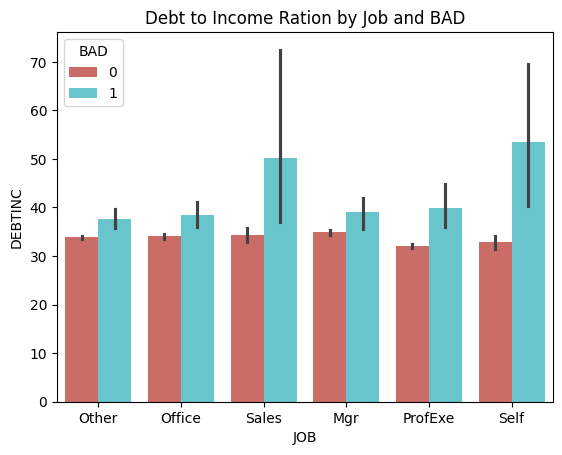

In [26]:
sns.barplot(df,x='JOB',y='DEBTINC',hue ='BAD',palette='hls')
plt.title('Debt to Income Ration by Job and BAD')
plt.show()

### Observations:
Comparing the Debt to Income Ratio against the profession of the borrower we can observe a few things.
 - Borrowers who work in sales and defaulted on their loan have a *higher* debt to income ratio.
 - Borrowers who are self employed and defaulted on their loan also have a *higher* debt to income ratio.
 - This could indicate professions where income is volatile, loans become harder to payback.
- Professions such as **Office, Manager, and Professional Executives** where income has more stability, we observe *lower* Debt-to-income ratios.

<Figure size 1200x1200 with 0 Axes>

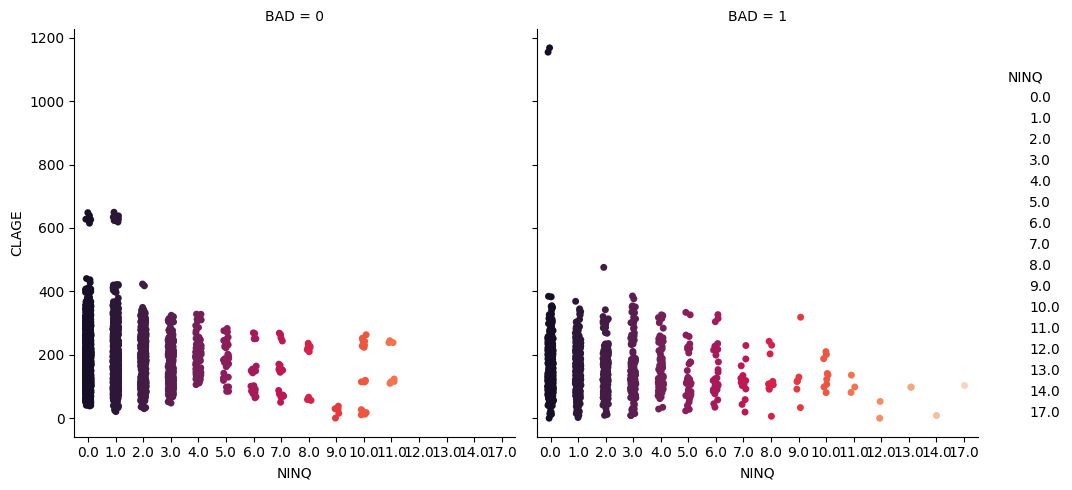

In [27]:
plt.figure(figsize=(12,12))
sns.catplot(df,x='NINQ',y='CLAGE',kind='strip',col ='BAD',palette='rocket')
plt.show()


### **Now lets answer some of the leading questions provided to us earlier:**

#### **1. What is the range of values for the loan amount variable "LOAN"?**

- From what we were able to observe, LOAN is *right skewed* and the inner quartile ranges from 11,100 to 23,300

#### **2. How does the distribution of years at present job "YOJ" vary across the dataset?**
- The YOJ has a *right skewed distribution*, we can observe that majority of borrowers stay within their job around 0 - 20 years

#### **3. How many unique categories are there in the REASON variable?**
- There are two REASON categories: Home Improvement and Debt Consolidation

#### **4. What is the most common category in the JOB variable?**
- Aside from "Other" being the most selected category for **Job**, the second most common is the **Professional Executive**.

#### **5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?***
- The data shows that borrowers whose reasons are toward **Home Improvement**: 22% of them default on a loan. For **Debt Consolidation** 18% of borrowers defaulted on a loan.

#### **6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?**
- We can observe that those who repay their loans have a slightly higher loan amount versus those who have lower amounts.

#### **7. Is there a correlation between the value of the property and the loan default rate?**
- There is a slight negative correlation between **BAD** and **VALUE** (-.03), meaning there is no linear relationship between the two variables.

#### **8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?**

- Yes, according to the dataset provided, we observed that borrowers who defaulted on their loans, had *less* of their mortgage due compared to the borrowers who repaid their loans.

## Treating Missing Values

Before we treat any of our outliers, we will handle our missing values present in the dataset.

- We will use the ***mean*** values for variables that have mean that is not skewed by outliers to fill in the missing values, ***mode*** for categorical variables, and ***median*** for the variables that contain outliers skewing the mean.

In [28]:
# Replacing variables with mean:

df['YOJ'] = df['YOJ'].fillna(df['YOJ'].mean())

df['CLNO'] = df['CLNO'].fillna(df['CLNO'].mean())

# Replacing variables with mode:

df['JOB'] = df['JOB'].fillna(df['JOB'].mode()[0])
df['REASON'] = df['REASON'].fillna(df['REASON'].mode()[0])

# Replacing variables with median:

df['LOAN'] = df['LOAN'].fillna(df['LOAN'].median())

df['MORTDUE'] = df['MORTDUE'].fillna(df['MORTDUE'].median())

df['VALUE'] = df['VALUE'].fillna(df['VALUE'].median())

df['DEROG'] = df['DEROG'].fillna(df['DEROG'].median())

df['DELINQ'] = df['DELINQ'].fillna(df['DELINQ'].median())

df['NINQ'] = df['NINQ'].fillna(df['NINQ'].median())

df['CLAGE'] = df['CLAGE'].fillna(df['CLAGE'].median())

df['DEBTINC'] = df['DEBTINC'].fillna(df['DEBTINC'].median())

In [29]:
# Checking for any missing values:

df.isna().sum()

,0
BAD,0
LOAN,0
MORTDUE,0
VALUE,0
REASON,0
JOB,0
YOJ,0
DEROG,0
DELINQ,0
CLAGE,0


In [30]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.0,9.000000,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.0,14.000000,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.0,10.000000,34.818262
3,1,1500,65019.0,89235.5,DebtCon,Other,8.922268,0.0,0.0,173.466667,1.0,21.296096,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.0,14.000000,34.818262


## Treating Outliers

Now that we have treated the missing values, we can start treating our outliers to prepare the data for **Logistic Regression**

In [31]:
# Create a new dataframe for Logistic Regression
df_1 = df.copy()
df_1.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.0,9.000000,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.0,14.000000,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.0,10.000000,34.818262
3,1,1500,65019.0,89235.5,DebtCon,Other,8.922268,0.0,0.0,173.466667,1.0,21.296096,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.0,14.000000,34.818262


## **Important Insights from EDA**

***What are the the most important observations and insights from the data based on the EDA performed?***

- One of the most important conclusions that we can draw upon is that the dataset provided shows a higher rate of borrowers repaying back their loans versus those who default. **80% non-defaulters** ,and **20% defaulted on a loan**. This implies that the dataset is *imbalanced* and would need to be considered when building various models.

- When observing the correlation against BAD, DELINQ, DEROG, and DEBTINC had stronger positive correlations than other variables in the dataset. This could suggest that with more delinquent reports, frequent derogatory reports, and a high debt to income ratio, borrowers are likely to default. These variables will likely be important features during the model building phase.

- Jobs that have more volatility with income such as a **Sales** which often earn a commission base income and individuals who are **Self Employeed** where income is dependant on business performance, show *higher* debt to income ratio.

- The most common reason a borrow takes out a loan is for **Debt Consolidation**. However, for the proportion of borrowers who defaulted on a loan **Home Improvement** had a 22% rate of loans that defaulted.





## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

### Data preperation


In [32]:
# Scaling numerical variables and creating dummy variables
# Treating continuous right-skewed variables

log_columns = ['VALUE','MORTDUE','LOAN','YOJ','DEBTINC']

for i in log_columns:
  df_1[i] = np.log1p(df_1[i])


num_cols = ['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']
cat_cols = ['REASON','JOB']

df_num = df_1[num_cols]
df_cat = df_1[cat_cols]

scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df_num)

df_scaled = pd.DataFrame(df_scaled_array, columns=num_cols, index=df_1.index)

df_dummy = pd.get_dummies(df_cat, drop_first=True)

df_final = pd.concat([df_scaled, df_dummy], axis=1)

In [33]:
# Changing True and False to 1 and 0


map_cols = ['REASON_HomeImp','JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self']
df_final[map_cols] = df_final[map_cols].astype(int)
df_final.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-4.626473,-1.416344,-1.669988,0.528190,-0.280976,-0.375943,-1.018026,-0.102879,-1.236106e+00,0.193368,1,0,1,0,0,0
1,-4.337017,0.201908,-0.542868,0.119851,-0.280976,1.477341,-0.689350,-0.707574,-7.334643e-01,0.193368,1,0,1,0,0,0
2,-4.089035,-2.471826,-3.374770,-0.408994,-0.280976,-0.375943,-0.358680,-0.102879,-1.135578e+00,0.193368,1,0,1,0,0,0
3,-4.089035,0.080813,-0.008787,0.362150,-0.280976,-0.375943,-0.071488,-0.102879,3.571484e-16,0.193368,0,0,1,0,0,0
4,-3.872118,0.743748,0.447593,-0.660074,-0.280976,-0.375943,-1.030391,-0.707574,-7.334643e-01,0.193368,1,1,0,0,0,0


In [34]:
# Splitting the the variables into target and variables.

X = df_final[['REASON_HomeImp','JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self','REASON_HomeImp','JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self']]
y = df['BAD']


We are now ready to build models with our new database.

To recap we:
- Updated the missing values
- Scaled our numerical variables
- Used one-hot encoding for our categorical variable
- Split our datas between independant and dependant variables.

We'll be starting with **Logistic Regression**.

### Logistic Regression

An important note to make, our target variable is imbalanced and biased toward the **Class 0**.

**Repaid Loan** = 80%

**Defaulted on a loan** = 20%

This will cause the model to be biased towards Class 0 which will skew our perfomance metrics if not treated ahead of time, especially since the minority class is important to classify.

By tuning the hyperparameter to *balanced*, the model will adjust the weights towards each class.

In [115]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=1)

model_1 = LogisticRegression(class_weight='balanced',random_state=1)
model_1.fit(X_train,y_train)


LogisticRegression(class_weight='balanced', random_state=1)

In [116]:
#Performance on training data
y_pred_train = model_1.predict(X_train)

print('Class 1:')
print(f'Precision Score:',precision_score(y_train,y_pred_train,pos_label=1))
print(f'Recall Score:',recall_score(y_train,y_pred_train,pos_label=1))
print(f'F1 Score:',f1_score(y_train,y_pred_train,pos_label=1))
print(f'Accuracy Score:',accuracy_score(y_train,y_pred_train))

print('')
print('')

print('Class 0:')
print(f'Precision Score:',precision_score(y_train,y_pred_train,pos_label=0))
print(f'Recall Score:',recall_score(y_train,y_pred_train,pos_label=0))
print(f'F1 Score:',f1_score(y_train,y_pred_train,pos_label=0))
print(f'Accuracy Score:',accuracy_score(y_train,y_pred_train))



Class 1:
Precision Score: 0.30390334572490707
Recall Score: 0.6950053134962806
F1 Score: 0.42289039767216297
Accuracy Score: 0.6256291946308725


Class 0:
Precision Score: 0.8902905198776758
Recall Score: 0.6085706819963418
F1 Score: 0.7229551451187335
Accuracy Score: 0.6256291946308725


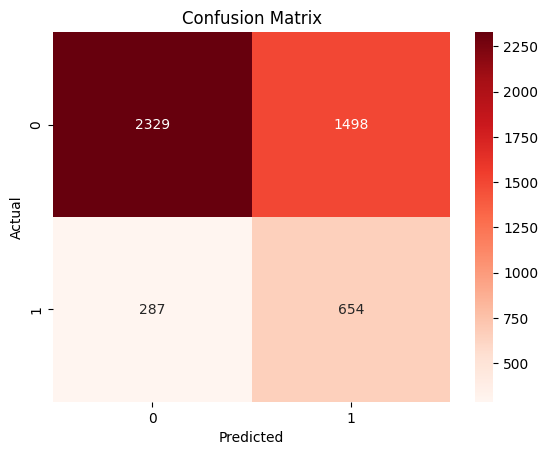

In [117]:
cm =confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [118]:
y_pred_test = model_1.predict(X_test)

print('Class 1:')
print(f'Precision Score:',precision_score(y_test,y_pred_test,pos_label=1))
print(f'Recall Score:',recall_score(y_test,y_pred_test,pos_label=1))
print(f'F1 Score:',f1_score(y_test,y_pred_test,pos_label=1))
print(f'Accuracy Score:', accuracy_score(y_test,y_pred_test))

print('')
print('')

print('Class 0:')
print(f'Precision Score:',precision_score(y_test,y_pred_test,pos_label=0))
print(f'Recall Score:',recall_score(y_test,y_pred_test,pos_label=0))
print(f'F1 Score:',f1_score(y_test,y_pred_test,pos_label=0))
print(f'Accuracy Score:', accuracy_score(y_test,y_pred_test))

Class 1:
Precision Score: 0.3078393881453155
Recall Score: 0.6491935483870968
F1 Score: 0.4176394293125811
Accuracy Score: 0.6233221476510067


Class 0:
Precision Score: 0.8699551569506726
Recall Score: 0.6165254237288136
F1 Score: 0.7216367017978921
Accuracy Score: 0.6233221476510067


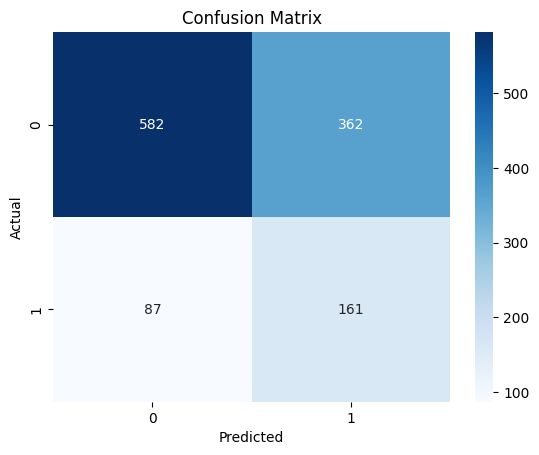

In [119]:
cm =confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The Logistic Regression model is having a hard time predicting the data classes.

**Training Data:**

The **Accuracy Score** for the training is showing 47%
**Precision Score** is very low, 23%
and F1 Score being 36%

The scores improved slightly with the new unseen data, however, values are still all under 50%

The confusion matrix shows 549 false positives, meaning the model predicted that 549 defaulted on their loan when they *did not*.


### Decision Tree

We'll now try a  **Decision Tree Classifier** to see if we can improve model performance.

In [46]:
df.columns
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.0,9.000000,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.0,14.000000,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.0,10.000000,34.818262
3,1,1500,65019.0,89235.5,DebtCon,Other,8.922268,0.0,0.0,173.466667,1.0,21.296096,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.0,14.000000,34.818262


In [47]:
# Preprocessing: One-Hot Encoding
X = pd.get_dummies(df,columns=['REASON','JOB'])

# Mapping True False to 1 and 0

map_cols1 = ['REASON_DebtCon','REASON_HomeImp','JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self','JOB_Mgr']

X[map_cols1] = X[map_cols1].astype(int)


In [48]:
# Dropping Target and assigning to variable y

X = X.drop(columns = 'BAD')
y = df['BAD']


In [54]:
# Creating a function to calcluate the classification report and  create a confusion matrix

def report_matrix(actual,predicted,hue):
  """ This function is designed to display classification report and create a confusion matrix. For training Hue = Reds. For testing Hue = Blues.
   """
  print(classification_report(actual,predicted))

  cm = confusion_matrix(actual,predicted)

  sns.heatmap(cm,annot=True,fmt='d',cmap=hue)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

In [55]:
## Important features function

def imp_features(model):
  """ This function is designed to display the models most import features"""

  dt_fi = model.feature_importances_
  columns = X.columns
  importance_df = pd.DataFrame(dt_fi,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
  plt.figure(figsize=(10,10))
  sns.barplot(importance_df,x='Importance',y=importance_df.index,palette='RdBu')
  plt.title('Feature Importance')
  plt.show()

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=1)

In [52]:
model_2 = DecisionTreeClassifier(class_weight='balanced',random_state=1)
model_2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3827
           1       1.00      1.00      1.00       941

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



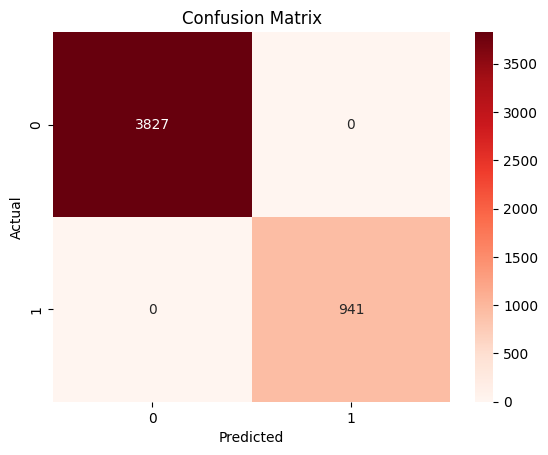

In [57]:
y_pred_train = model_2.predict(X_train)
report_matrix(y_train,y_pred_train,'Reds')

### Observations:
The model is performing **really well** with the training data. This means that the model is memorizing all the noise and the patterns in the data.
Precision, Recall, F1, and Accuracy Score are all 1.0

We'll now see how the model works with uncseen actual data.

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       944
           1       0.68      0.60      0.64       248

    accuracy                           0.86      1192
   macro avg       0.79      0.76      0.77      1192
weighted avg       0.85      0.86      0.85      1192



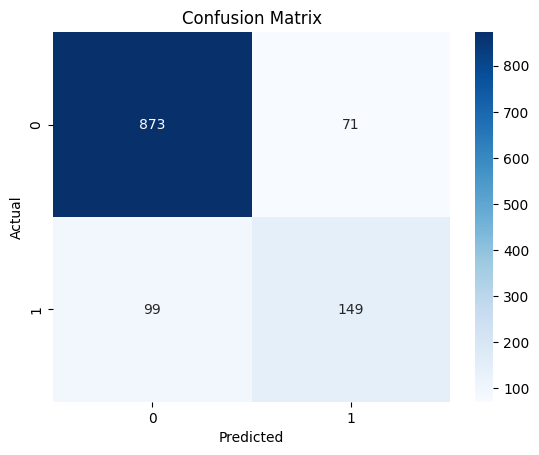

In [58]:
y_pred_test = model_2.predict(X_test)

report_matrix(y_test,y_pred_test,'Blues')

### Observations:
Based on the test performance, The model is overfitting. Because the model did exceptionally well on the training data and is under performing on the test data. For the Default Class we can see the F1- Score dropped from 1.0 to .64.

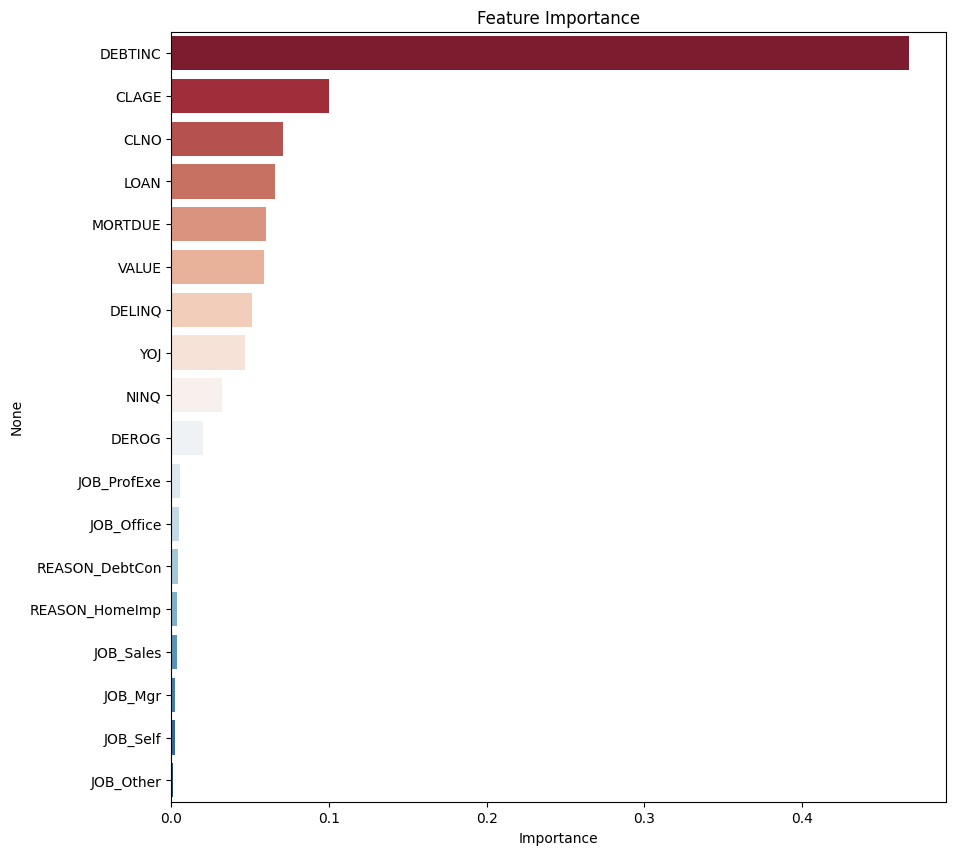

In [60]:
imp_features(model_2)

By looking at the import features, the model is suggesting **Debt to income ratio** as the number 1 important feature. Followed by **CLAGE** and **CLNO**.

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [59]:
# Hyper parameter tuning, using GridSearch
model_3 = DecisionTreeClassifier(class_weight={0:.70,1:.29},random_state=1)

parameters = {'max_depth': np.arange(2,8),
              'criterion':['gini','entropy'],
              'min_samples_leaf': [5,10,20,25]
             }
scorer = metrics.make_scorer(recall_score,pos_label=1)

gridCV = GridSearchCV(model_3,parameters,scoring = scorer,cv =10)

gridCV = gridCV.fit(X_train,y_train)

model_3 = gridCV.best_estimator_

model_3.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.29}, criterion='entropy',
                       max_depth=np.int64(7), min_samples_leaf=5,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      3827
           1       0.92      0.50      0.65       941

    accuracy                           0.89      4768
   macro avg       0.91      0.74      0.79      4768
weighted avg       0.90      0.89      0.88      4768



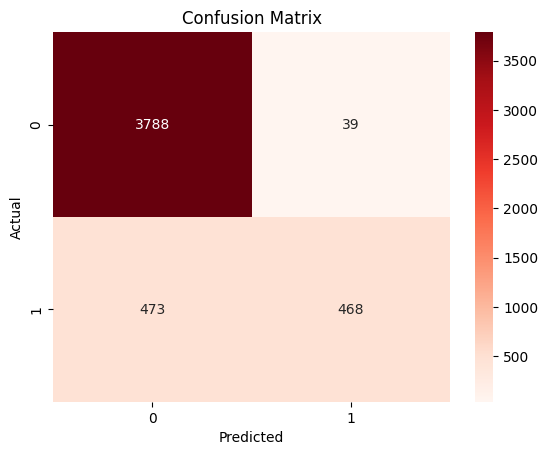

In [62]:
y_pred_train = model_3.predict(X_train)

report_matrix(y_train,y_pred_train,'Reds')

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       944
           1       0.86      0.36      0.51       248

    accuracy                           0.85      1192
   macro avg       0.85      0.67      0.71      1192
weighted avg       0.85      0.85      0.83      1192



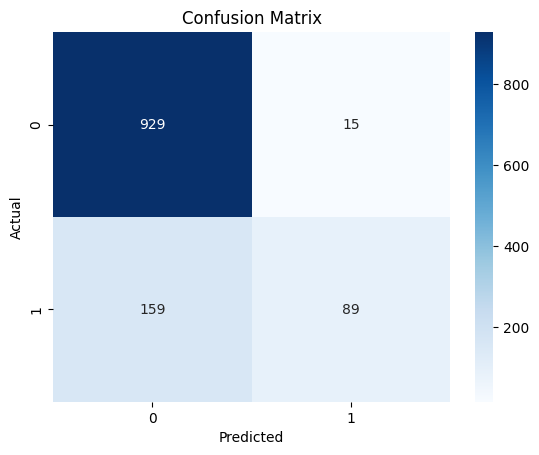

In [63]:
y_pred_test = model_3.predict(X_test)
report_matrix_if(y_test,y_pred_test,'Blues')

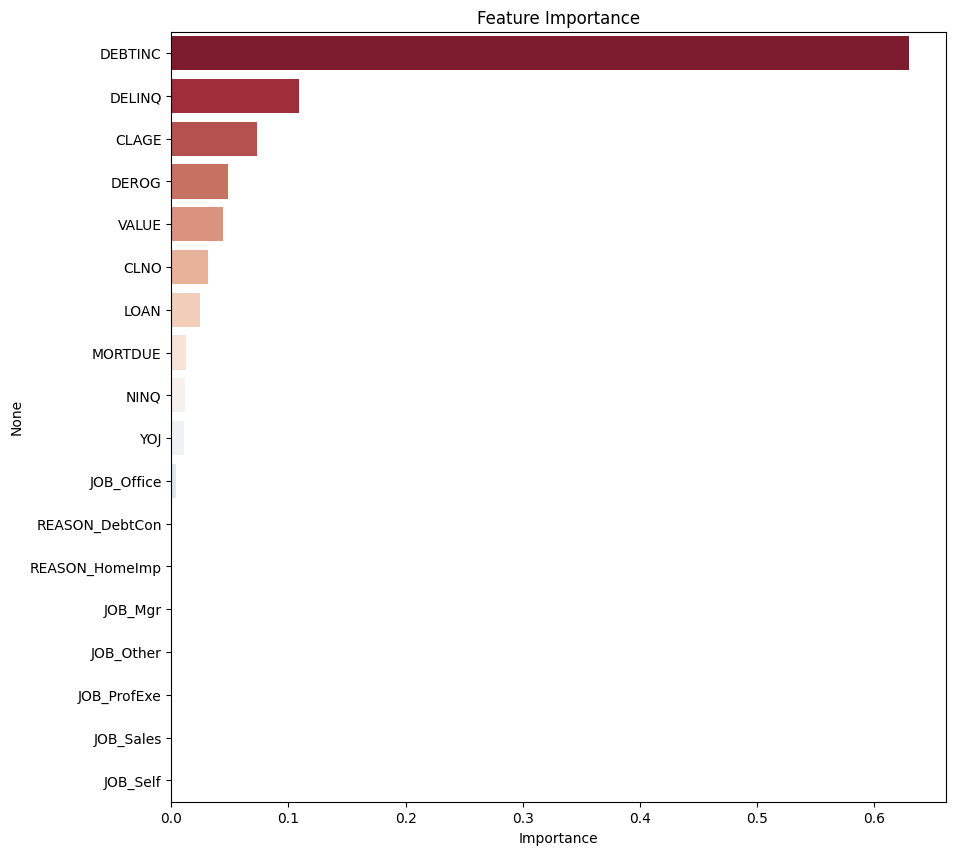

In [48]:
imp_features(model_3)

### Observations:
The model is showing slight signs of improvement not memorizing the noise in the data. However, the confusion matrix shows that the model is struggling to identify the group who defaulted on a loan. In the training data **473 false negatives**. And for the test data, **159 false negatives**.

#### Class 0:
The training data is showing a high precision score of 89 meaning the model is predicting someone who does not default 89% prcent of the time.

Comparing to the test performance, dropped 4% which is still fair.

Recall is showing 99% meaning the model is correctly identifying the non-defaulting class but likely memorizing noise.

#### Class 1:
Precision is .92 in the training data and fell to 86 with the new unseen data.
Recall score for both the training and testing are underperforming compared to the prior model. training recall .50, and testing recall .38.


#### Important Features:
The number 1 important feature that we see here is **debt to income ratio**. This is consistent with the model we noticed prior to any change in parameters.

Other top important features are **DELINQ, CLAGE, DEROG, and VALUE**


### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [64]:
model_4 = RandomForestClassifier(class_weight='balanced')
model_4.fit(X_train,y_train)
y_pred_train = model_4.predict(X_train)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3827
           1       1.00      1.00      1.00       941

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



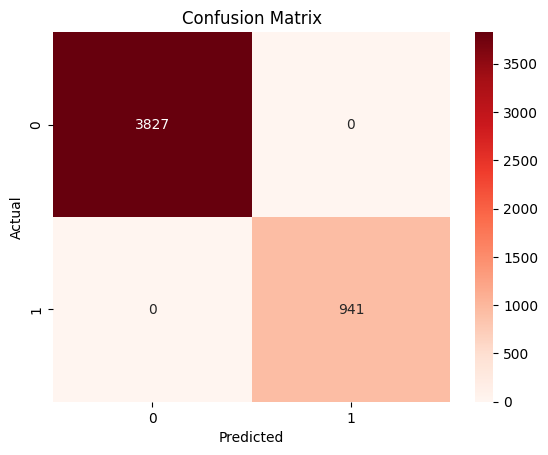

In [65]:
report_matrix(y_train,y_pred_train,'Reds')

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       944
           1       0.90      0.65      0.75       248

    accuracy                           0.91      1192
   macro avg       0.91      0.81      0.85      1192
weighted avg       0.91      0.91      0.91      1192



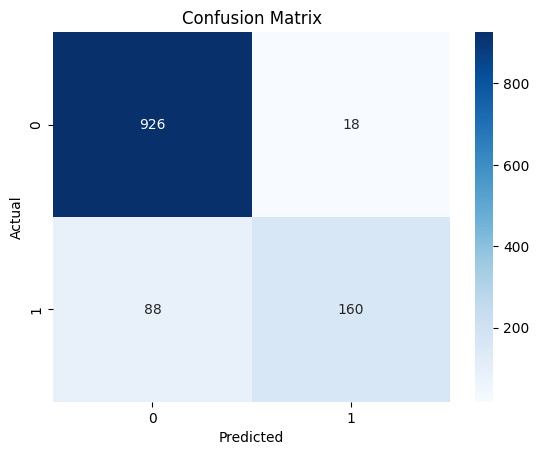

In [67]:
y_pred_test = model_4.predict(X_test)

report_matrix(y_test,y_pred_test,'Blues')

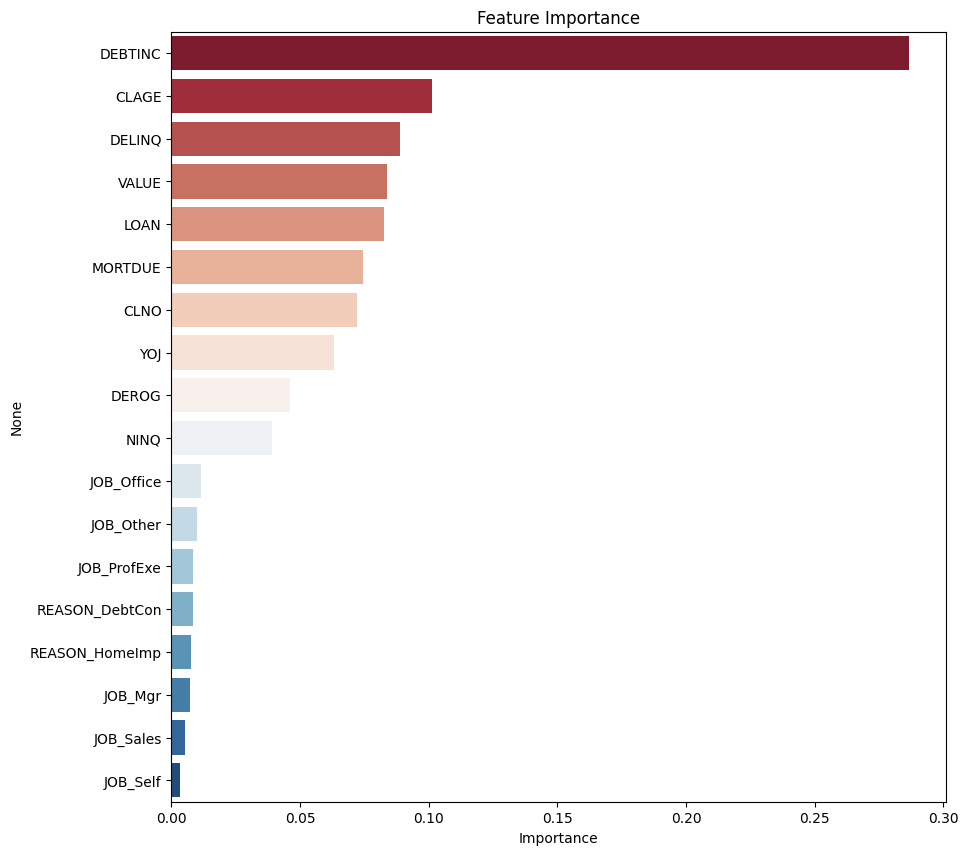

In [68]:
imp_features(model_4)

### Observations:

Switching the model from a Decision Tree to Random Forest Classifier, The model is still showing signs of overfitting. It is doing **exceptionally** well with the training data, but doing poorly with the new unseen data.

We can see that recall for Class 1 *fell* from 1. to .66.

#### Important Features
We are consistently seeing **debt to income ratio** as the top feature when determining borrower habits.

Some other top features that we've seen appear are **CLAGE, DELINQ, and VALUE** as strong indecators on loan repayment.


### **Random Forest Classifier Hyperparameter Tuning**

In [69]:
model_5 = RandomForestClassifier(class_weight='balanced',random_state=1)

## create a scorer to focus on improving recall

recall_scorer = make_scorer(recall_score,pos_label=1)

parameters_rf = { 'n_estimators': [100,200,300],
                 'max_depth': [10,15,20],
                 'min_samples_split':[5,10],
                 'min_samples_leaf':[2,4],
                 'max_features':['sqrt','log2']
                }

model_5 = GridSearchCV( estimator=model_5, param_grid=parameters_rf, n_jobs=-1, scoring = recall_scorer,cv =5,verbose=2)


model_5.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(recall_score, response_method='predict', pos_label=1),
             verbose=2)

In [71]:
y_pred_train = model_5.predict(X_train)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3827
           1       0.80      0.92      0.86       941

    accuracy                           0.94      4768
   macro avg       0.89      0.93      0.91      4768
weighted avg       0.94      0.94      0.94      4768



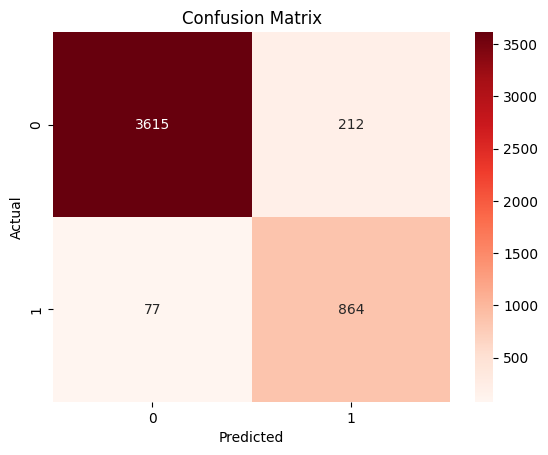

In [72]:
report_matrix(y_train,y_pred_train,'Reds')

In [73]:
y_pred_test = model_5.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       944
           1       0.78      0.76      0.77       248

    accuracy                           0.91      1192
   macro avg       0.86      0.85      0.86      1192
weighted avg       0.90      0.91      0.90      1192



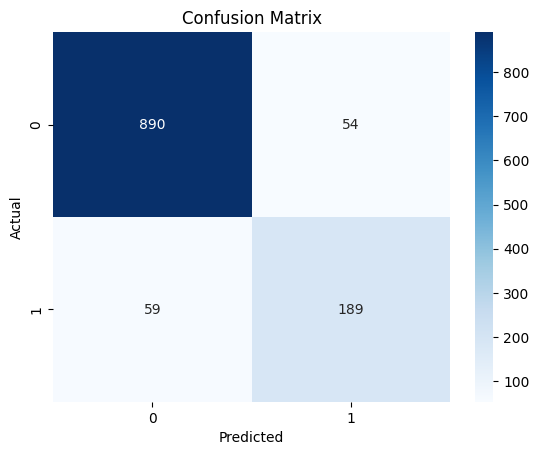

In [74]:
report_matrix(y_test,y_pred_test,'Blues')

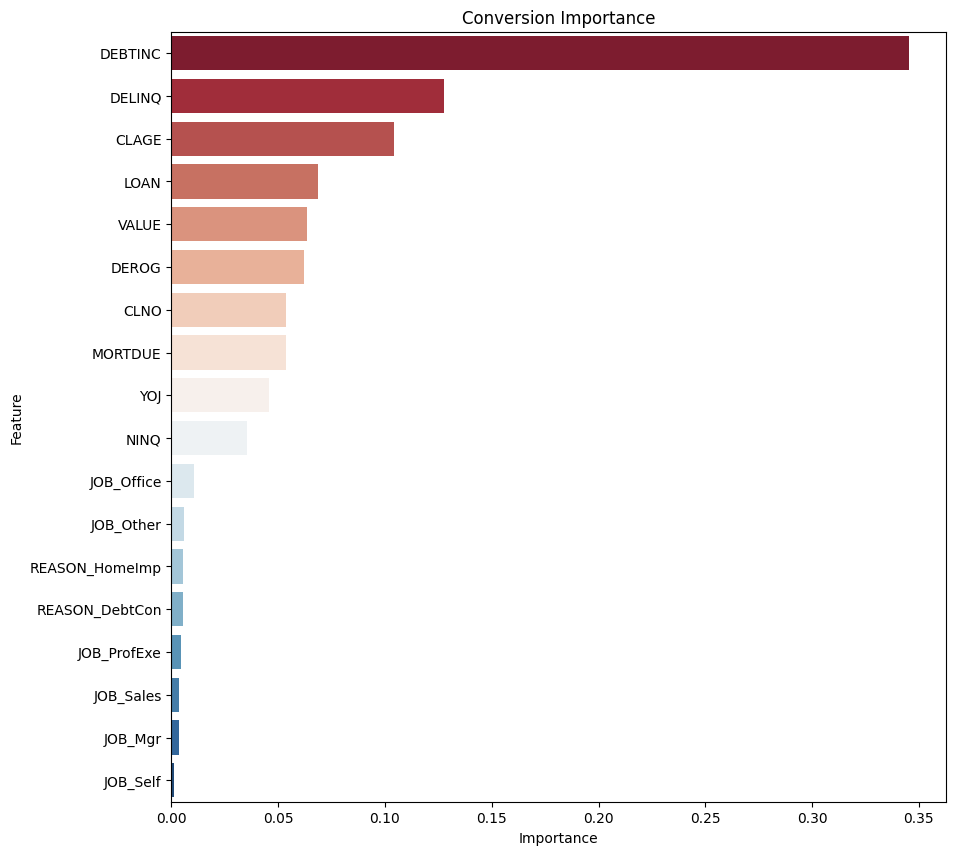

In [70]:
model_5_if = model_5.best_estimator_

rf_fi = model_5_if.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_fi }).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='RdBu')
plt.title('Conversion Importance')
plt.show()

### Observations:
- After using Gridsearch to find the best parameters for our model, we can observe that the training data is performing better than the preivious models, The test data for class 1 shows recall score dropped from .92 to .76.

- Out of all the models thus far, this model is handling the false negatives the best for the testing data:

  -  Model 1 (Logistic Regression) : 75 False Negatives
  -   Model 2 (Decision Tree): 99 False Negatives
  -   Model 3 (Decision Tree Tuned): 159 False Negatives
  -   Model 4 (Random Forest): 87 False Negatives
  -   Model 5 (Random Forest Tuned): 59 False Negatives

### Important Features:
- The most important Feature in the model is the **Debt to income ratio**. This has become constant amongest all the models. The same can be said with **CLAG, and DELINQ.**

- Though the model is overfitting, we can try to tune the model based on the best features to simplify the model.




### Random Forest Model Tuned (2)

Based off of our observations of the prior model. We'll try to simplify the model even further to see if it will improve performance.

In [76]:
#Identifying the best estimators from the previous model

model_5.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=300, random_state=1)

In [77]:
model_6 = RandomForestClassifier(class_weight='balanced',max_depth=5,min_samples_leaf=4,min_samples_split=5,n_estimators=200)

In [78]:
model_6.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=200)

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3827
           1       0.61      0.82      0.70       941

    accuracy                           0.86      4768
   macro avg       0.78      0.85      0.81      4768
weighted avg       0.88      0.86      0.87      4768



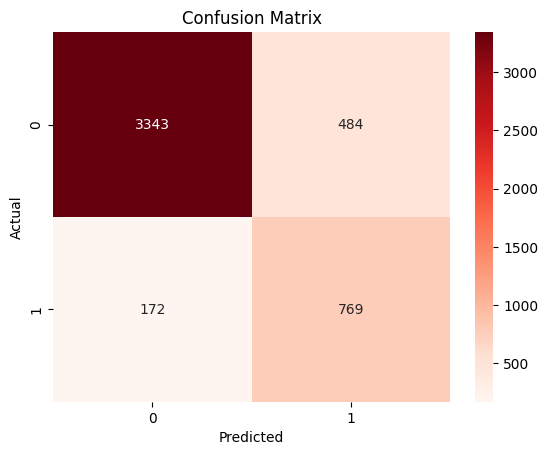

In [82]:
y_pred_train = model_6.predict(X_train)

report_matrix(y_train,y_pred_train,'Reds')

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       944
           1       0.63      0.78      0.70       248

    accuracy                           0.86      1192
   macro avg       0.78      0.83      0.80      1192
weighted avg       0.87      0.86      0.86      1192



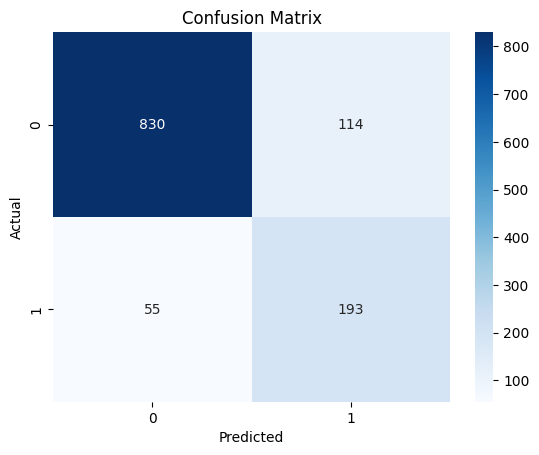

In [81]:
y_pred_test = model_6.predict(X_test)

report_matrix(y_test,y_pred_test,'Blues')

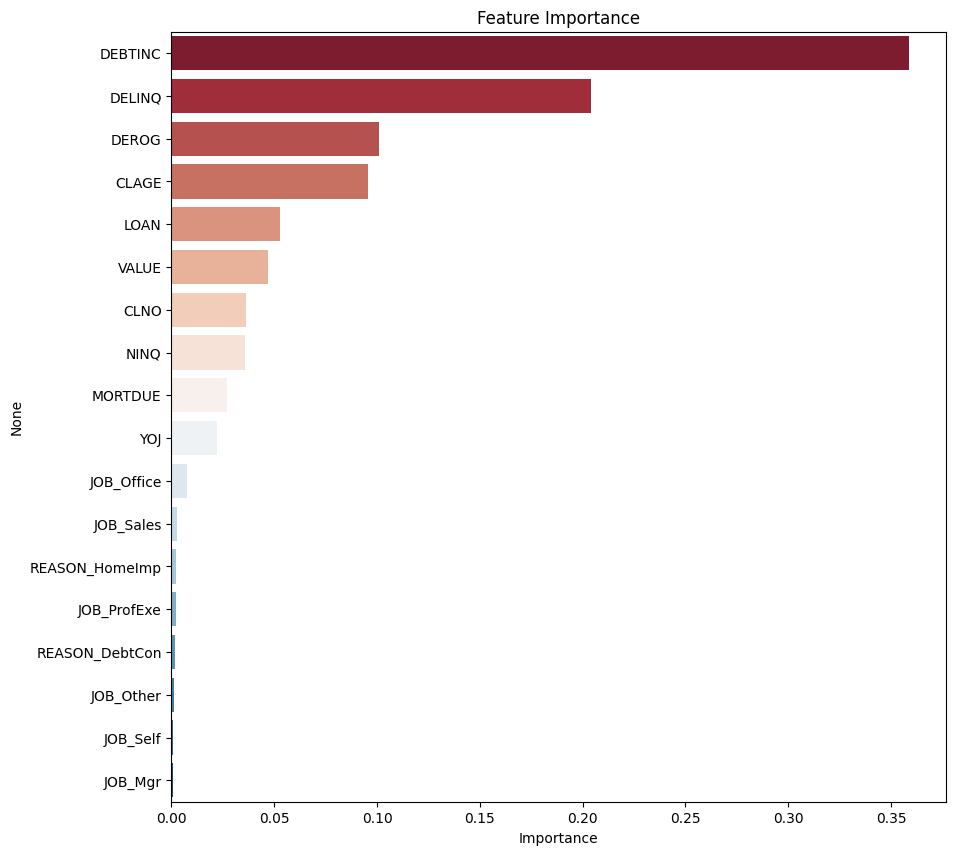

In [83]:
imp_features(model_6)

### Observations:
- The new model is performing fairly well when it comes to the improvement in recall score for Class 1 from .76 to .77

- Because the model is now suffering in precision score (.64), f1 score compared to the previous model fell from .77 to .71.

### Important Features:

Once again, **Debt to income ratio** is still the number 1 important feature that each of the models detect. This is likely to suggest that determining whether a borrower will default on their loan is dependant on their Debt-to-income Ratio.


## Comparing Each Model
We will now compare how each model did in predicting Defaulting Class(Borrowers who Defaulted on a Loan)


In [84]:
comparison_df = pd.DataFrame([('Model 1(LogReg)','Training',.30,.69,.42,.62),
                              ('Model 1(LogReg)','Test',.30,.64,.41,.62),
                              ('Model 2(DecTree)','Training',1.0,1.0,1.0,1.0),
                              ('Model 2(DecTree)','Test',.68,.60,.64,.86),
                              ('Model 3(DecTree Tuned)','Training',.92,.50,.65,.89),
                              ('Model 3(DecTree Tuned)','Test',.86,.36,.51,.85),
                              ('Model 4(RandForest)','Training',1.0,1.0,1.0,1.0),
                              ('Model 4(RandForest)','Test',.92,.65,.76,.92),
                              ('Model 5(RandForest Tuned)','Training',.80,.92,.86,.94),
                              ('Model 5(RandForest Tuned)','Test',.78,.76,.77,.91),
                              ('Model 6(RandForest Tuned 2)','Training',.62,.82,.71,.87),
                              ('Model 6(RandForest Tuned 2)','Test',.64,.77,.70,.86)
                              ],columns=['Model','Train_Test','Precision Score','Recall Score','F1 Score','Accuracy Score'])

In [86]:
print('Performance Metrics Compared Across all Models:')
print('')
comparison_df


Performance Metrics Compared Across all Models:



,Model,Train_Test,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Model 1(LogReg),Training,0.30,0.69,0.42,0.62
1,Model 1(LogReg),Test,0.30,0.64,0.41,0.62
2,Model 2(DecTree),Training,1.00,1.00,1.00,1.00
3,Model 2(DecTree),Test,0.68,0.60,0.64,0.86
4,Model 3(DecTree Tuned),Training,0.92,0.50,0.65,0.89
5,Model 3(DecTree Tuned),Test,0.86,0.36,0.51,0.85
6,Model 4(RandForest),Training,1.00,1.00,1.00,1.00
7,Model 4(RandForest),Test,0.92,0.65,0.76,0.92
8,Model 5(RandForest Tuned),Training,0.80,0.92,0.86,0.94
9,Model 5(RandForest Tuned),Test,0.78,0.76,0.77,0.91


In [126]:
importance_rank = np.arange(1, 11)  # top 10

logreg_importance = pd.Series(abs(model_1.coef_[0]), index=x_train.columns).sort_values(ascending=False).head(10)
model2_importance = pd.Series(model_2.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(10)
model3_importance = pd.Series(model_3.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(10)
model4_importance = pd.Series(model_4.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(10)
model5_importance = pd.Series(model_5.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(10)
model6_importance = pd.Series(model_6.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(10)

importance_df = pd.DataFrame({
    'Importance Ranking': importance_rank,
    'Logistic Regression': logreg_importance.index,
    'Decision Tree 1': model2_importance.index,
    'Decision Tree 2': model3_importance.index,
    'Random Forest 1': model4_importance.index,
    'Random Forest 2': model5_importance.index,
    'Random Forest 3': model6_importance.index,
})

importance_df.head(5)

,Importance Ranking,Logistic Regression,Decision Tree 1,Decision Tree 2,Random Forest 1,Random Forest 2,Random Forest 3
0,1,DELINQ,DEBTINC,DEBTINC,DEBTINC,DEBTINC,DEBTINC
1,2,DEBTINC,CLAGE,DELINQ,CLAGE,DELINQ,DELINQ
2,3,NINQ,CLNO,CLAGE,DELINQ,CLAGE,DEROG
3,4,YOJ,LOAN,DEROG,VALUE,LOAN,CLAGE
4,5,DEROG,MORTDUE,VALUE,LOAN,VALUE,LOAN


### **1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
***- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?***

### **Performance:**
- When looking at the **first Logistic Regression Model**, it is clear that the model had some struggles when trying to classify the positive and the negative class. Precision Score was just .30 for both training and test.

  Due to the performance of the Precision Score, the models F1 score is below .50. This is not the best model as overall performance is not ideal for predicting classes.

- The **second model**, we used a DecisionTree Classifier to help improve the model performance. This approach was significantly better than the going with logistic regression mainly because of the f1 score improvement. However the model was showing signs of overfitting due to the difference in how the training model performed versus the testing. from 1.0 to .60 in Recall.

- The **Third Model** was a Decision Tree that was tuned with gridsearch to find the best estimators. Surprisingly, The DecisionTree's Recall fell drastically to .36 with the test data. This model underperformed prior to being tuned. Another approach would be to try and manually tune the model as well as simplifying it as well.

- For the **Fourth Model**, we turned RandomForest Classifier. This model showed some improvement in the Recall for Class 1. Compared to our last model, .36 to .65. The model could still be over fitting due to the training data not making any errors. F1 score 76 is a sign of good overall performance between both recall and precision.

- Our **Fifth Model** we used GridSearch to find the best parameters for our Random Forest Classifier. The results showed some significant improvement with Recall increasing and f1 score going up by .1. This approach did take a lot of computational resources which is not ideal. However, the estimators provided, did allow us to improve our metric scores.

- The final **Sixth Model** was an attempt to simplify the model slightly to see if we can get a better recall score for the defaulting class. With knowledge based off of the prior model for the best features, The attempt to scale back was implemented. With this attempt, Recall score did slightly improve, also it is much closer to the training data. The downside is, Precision is fell. Scince Precision fell, the F1 score also declined.

This will make the **5th model** the best model to make predictions on whether a borrower is likely to default. Precision Score is relativley close between training and test, and though Recall between the training and test arent as close, this model had the highest recall score compared to the rest of the models. This model also had the least amount of false negatives which is another indicator of a good performing model.



### **Important Features:**

Across all models, the most important feature was the debt to income ratio.
Because this feature showed up the most, it is clear that it has an impact on loan repayment behavior. This is important to note because bankers often look at this key metric to determine whether a person is qualified for a loan. If the ratio is high, the bank may not approve the loan or provide the best interest rates.

The number of Delinquent credit line was also common among each model. This would also make sense as this shows history that a borrower is likely to have delinquent habits and will default on the loan.

CLAGE also is a relevant feature that appeared often between the models. This suggest that the length of the a credit line holds importance on borrower behavior.



### **2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

The most meaningful insights would have to be how **Debt To income ratio** is a vital factor when making decisions on who should receive a loan. As stated prior, it would be wise for bankers to be interested in this metric because there happens to be a strong correlation.

We also noticed with Delinquent Credit lines, we obseved that borrowers who had more than 5 defaulted on a loan. This insight is important for understanding what customer habits are when requesting a loan.

Lastly, the data we received had a lot of missing values, which means there are several other ways to approach the data preprocessing stage. The method we executed could potentially be fine tuned a bit further to get a clearer picture of other methods to impute the data.



### **3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

I would suggest the use of the 5th model. This model was the RandomForest Classifier that used GridSearch to find the best estimators. The help of this tool helped to improve the models recall score and overall performance with the F1 score. The important features intuitively explains the imporantance in certain features on borrower behavior.

Comparatively, This model performed the best out of all the other models, and does a fair job at predicting the Class 1 with fewer false negatives.


In [133]:
!jupyter nbconvert --to html "/content/drive/MyDrive/MIT Program Files/Colab Notebooks/Capstone Project/Capstone Project - Loan Default Prediction - Ricardo Mirville.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/MIT Program Files/Colab Notebooks/Capstone Project/Capstone Project - Loan Default Prediction - Ricardo Mirville.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 42 image(s).
[NbConvertApp] Writing 4056291 bytes to /content/drive/MyDrive/MIT Program Files/Colab Notebooks/Capstone Project/Capstone Project - Loan Default Prediction - Ricardo Mirville.html
